In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import re

In [ ]:
upload = files.upload()
#df = pd.read_csv('/content/finalvahid.csv')
df = pd.read_stata('/content/corrected_kelly_year_based.dta')

Saving corrected_kelly_year_based.dta to corrected_kelly_year_based.dta


In [ ]:
df.dropna(subset=['filed_year'], inplace=True)

df['filed_year'] = df['filed_year'].astype(int)


df.set_index('filed_year', inplace=True)
df['total_sum'] = df.sum(axis=1)

<ipython-input-3-46a48086fcc6>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['total_sum'] = df.sum(axis=1)


In [ ]:
df.head(20)

A01       A21       A22       A23       A24       A41  A42  \
filed_year                                                                     
1834         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1835         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1836         6.500000  0.000000  0.000000  0.000000  0.000000  0.000000  1.0   
1837        22.000000  0.000000  0.000000  1.000000  2.000000  7.000000  1.0   
1838        44.166667  0.000000  1.000000  4.500000  0.333333  1.500000  0.0   
1839        37.500000  0.000000  0.000000  2.000000  1.000000  4.000000  0.0   
1840        34.000000  1.000000  0.500000  3.500000  0.500000  4.500000  3.0   
1841        31.000000  1.000000  0.000000  4.500000  0.000000  6.500000  2.0   
1842        44.333333  2.000000  0.000000  0.500000  1.000000  5.000000  3.0   
1843        52.500000  2.500000  0.333333  3.333333  1.000000  6.000000  2.5   
1844        40.000000  4.333333  0.000000  0.000000  2.000000  4.000000  5.0   
1845        36.500000  2.000000  0.000000  4.000000  1.000000  3.000000  6.0   
1846        57.000000  3.500000  0.000000  1.000000  3.500000  9.000000  4.0   
1847        41.500000  4.000000  0.000000  3.000000  1.000000  4.000000  2.5   
1848        58.000000  5.333333  1.000000  3.333333  1.333333  3.833333  1.0   
1849        86.500000  2.500000  2.000000  9.500000  0.000000  4.500000  4.0   
1850        84.833333  4.500000  2.500000  6.000000  2.000000  4.000000  2.0   
1851        45.500000  5.000000  0.000000  2.500000  0.000000  5.000000  2.0   
1852        84.666667  0.500000  1.000000  3.000000  2.500000  4.000000  2.0   
1853        89.166667  0.000000  2.500000  2.500000  0.000000  1.000000  2.0   

            A43       A44       A45  ...  G60       H01  H02       H03  H04  \
filed_year                           ...                                      
1834        0.0  0.000000  0.000000  ...  0.0  0.000000  0.0  0.000000  0.0   
1835        0.0  0.000000  0.000000  ...  0.0  0.000000  0.0  0.000000  0.0   
1836        2.0  0.000000  1.000000  ...  0.0  0.000000  0.0  0.000000  0.0   
1837        4.0  1.000000  1.000000  ...  0.0  1.000000  1.0  0.000000  0.0   
1838        5.0  0.000000  4.000000  ...  0.0  0.500000  2.0  0.000000  0.0   
1839        5.0  0.500000  2.000000  ...  0.0  0.000000  2.0  0.000000  0.0   
1840        2.0  1.500000  4.000000  ...  0.0  0.000000  1.0  0.000000  1.0   
1841        3.0  1.500000  1.000000  ...  0.0  0.000000  2.0  0.000000  0.0   
1842        5.0  1.000000  3.000000  ...  0.0  1.333333  0.0  0.000000  0.0   
1843        4.0  1.000000  2.500000  ...  0.0  1.500000  2.0  0.000000  0.0   
1844        5.0  1.500000  1.000000  ...  0.0  1.000000  0.0  0.000000  0.0   
1845        6.0  2.333333  0.000000  ...  0.0  0.000000  0.0  0.000000  1.0   
1846        5.0  0.000000  2.500000  ...  0.0  1.000000  1.0  0.000000  1.0   
1847        3.0  1.500000  0.000000  ...  0.0  1.333333  0.0  0.833333  0.0   
1848        7.0  0.500000  3.000000  ...  0.0  3.500000  1.5  0.000000  4.0   
1849        9.5  5.000000  1.000000  ...  0.0  3.000000  1.0  0.000000  4.5   
1850        3.5  5.000000  3.500000  ...  0.0  2.000000  1.5  0.000000  7.0   
1851        7.0  2.500000  3.333333  ...  0.0  2.500000  4.0  0.000000  4.0   
1852        8.5  2.000000  2.000000  ...  0.0  4.666667  3.5  1.000000  1.0   
1853        8.5  0.500000  4.000000  ...  0.0  2.333333  1.0  0.500000  2.0   

                 H05       Y02  Y04        Y10   total_sum  
filed_year                                                  
1834        0.000000  0.000000  0.0   0.000000    1.000000  
1835        0.000000  0.000000  0.0   0.000000    1.000000  
1836        0.000000  0.500000  0.0  11.666667  103.000000  
1837        1.000000  0.333333  0.0  36.666667  433.000000  
1838        0.000000  1.166667  0.0  56.666667  511.000000  
1839        0.333333  1.166667  0.0  33.000000  400.000000  
1840        0.000000  1.500000

In [ ]:
columns_to_normalize = df.columns[:-1]  # Exclude the last column which is 'total_sum'

# Divide each value in the row by the total sum of that row
share_df = df[columns_to_normalize].div(df['total_sum'], axis=0)
# share_df['total_sum'] = share_df.sum(axis=1)
# Print or view share_df
share_df.head()

A01  A21       A22       A23       A24       A41       A42  \
filed_year                                                                    
1834        0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1835        0.000000  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1836        0.063107  0.0  0.000000  0.000000  0.000000  0.000000  0.009709   
1837        0.050808  0.0  0.000000  0.002309  0.004619  0.016166  0.002309   
1838        0.086432  0.0  0.001957  0.008806  0.000652  0.002935  0.000000   

                 A43       A44       A45  ...       G21  G60       H01  \
filed_year                                ...                            
1834        0.000000  0.000000  0.000000  ...  0.000000  0.0  0.000000   
1835        0.000000  0.000000  0.000000  ...  0.000000  0.0  0.000000   
1836        0.019417  0.000000  0.009709  ...  0.000000  0.0  0.000000   
1837        0.009238  0.002309  0.002309  ...  0.000000  0.0  0.002309   
1838        0.009785  0.000000  0.007828  ...  0.000978  0.0  0.000978   

                 H02  H03  H04       H05       Y02  Y04       Y10  
filed_year                                                         
1834        0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  
1835        0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  
1836        0.000000  0.0  0.0  0.000000  0.004854  0.0  0.113269  
1837        0.002309  0.0  0.0  0.002309  0.000770  0.0  0.084681  
1838        0.003914  0.0  0.0  0.000000  0.002283  0.0  0.110894  

[5 rows x 129 columns]

In [ ]:
# Extract unique 'letter and first number' combinations
unique_combinations = set()
for column in share_df.columns:
    match = re.match(r"([A-Z]+)(\d+)", column)
    if match:
        letter, number = match.groups()
        unique_combinations.add(letter + number[0])

# Display the unique combinations
print(unique_combinations)
print("Number of unique combinations:", len(unique_combinations))

{'Y0', 'B6', 'A0', 'B0', 'A2', 'G6', 'E0', 'C1', 'G0', 'D2', 'G1', 'A4', 'B2', 'C3', 'H0', 'C4', 'C7', 'F1', 'C2', 'B3', 'F2', 'G2', 'B8', 'D0', 'D1', 'Y1', 'B4', 'E2', 'F0', 'A6', 'F4', 'C0'}
Number of unique combinations: 32


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your Google Drive folder
drive_path = '/content/drive/My Drive/'

# Define the folder name in your Google Drive
folder_name = 'patent_myself_17_Apr'

# Create the folder if it doesn't exist
folder_path = os.path.join(drive_path, folder_name)
os.makedirs(folder_path, exist_ok=True)

Mounted at /content/drive


In [ ]:
upload = files.upload()
df_name = pd.read_csv('/content/cpc_name_code.csv')

Saving cpc_name_code.csv to cpc_name_code.csv


In [ ]:
df_name.head()

name code
0                        HUMAN NECESSITIES    A
1                              AGRICULTURE   A0
2  AGRICULTURE; FORESTRY; HUNTING; FISHING  A01
3                      FOODSTUFFS; TOBACCO   A2
4                    BAKING; EDIBLE DOUGHS  A21

In [ ]:
df_name['name'] = df_name['name'].str.title()

# Now df_name['name'] will have the format you described
df_name.head()

name code
0                        Human Necessities    A
1                              Agriculture   A0
2  Agriculture; Forestry; Hunting; Fishing  A01
3                      Foodstuffs; Tobacco   A2
4                    Baking; Edible Doughs  A21

In [ ]:
# Find rows where 'code' is exactly 'D0'
filtered_df = df_name[df_name['code'] == 'D0']

# Extract the 'name' from the filtered rows
names_with_D0 = filtered_df['name']

# Print the names
print(names_with_D0)


91    Textiles Or Flexible Materials
Name: name, dtype: object


In [ ]:
column_list = df.columns.tolist()

# Display the list of columns
print(column_list)

['A01', 'A21', 'A22', 'A23', 'A24', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A61', 'A62', 'A63', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'B33', 'B41', 'B42', 'B43', 'B44', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B81', 'B82', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C21', 'C22', 'C23', 'C25', 'C30', 'C40', 'C70', 'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D10', 'D21', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06', 'E21', 'F01', 'F02', 'F03', 'F04', 'F05', 'F15', 'F16', 'F17', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F41', 'F42', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G21', 'G60', 'H01', 'H02', 'H03', 'H04', 'H05', 'Y02', 'Y04', 'Y10', 'total_sum']


In [ ]:
# Extract unique 'letter and first number' combinations
unique_combinations = set()
for column in column_list:
    match = re.match(r"([A-Z]+)(\d+)", column)
    if match:
        letter, number = match.groups()
        unique_combinations.add(letter + number[0])

# Display the unique combinations
print(unique_combinations)
print("Number of unique combinations:", len(unique_combinations))

{'Y0', 'B6', 'A0', 'B0', 'A2', 'G6', 'E0', 'C1', 'G0', 'D2', 'G1', 'A4', 'B2', 'C3', 'H0', 'C4', 'C7', 'F1', 'C2', 'B3', 'F2', 'G2', 'B8', 'D0', 'D1', 'Y1', 'B4', 'E2', 'F0', 'A6', 'F4', 'C0'}
Number of unique combinations: 32


In [ ]:
# Copy 'filed_year' from df
#filed_year_column = df['filed_year'].copy()

# Create a new DataFrame to store the summed values
summed_df = pd.DataFrame()

# Iterate through unique_combinations, group by the combination, and sum the values for each year
for combination in unique_combinations:
    related_columns = [col for col in share_df.columns if col.startswith(combination)]
    summed_values = share_df.groupby('filed_year')[related_columns].sum()
    summed_df[combination] = summed_values.sum(axis=1)

summed_df = summed_df.drop(summed_df.index[-1])

# Reset the index to convert 'filed_year' to a regular column
summed_df = summed_df.reset_index()

# Change the format of 'filed_year' to integer
summed_df['filed_year'] = summed_df['filed_year'].astype(int)
summed_df.set_index('filed_year', inplace=True)
# Display the resulting DataFrame
#summed_df['total_sum'] = summed_df.sum(axis=1)
summed_df.head(20)

Y0        B6        A0        B0        A2   G6        E0  \
filed_year                                                                    
1834        0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
1835        0.000000  0.000000  0.000000  1.000000  0.000000  0.0  0.000000   
1836        0.004854  0.069579  0.063107  0.012945  0.000000  0.0  0.024272   
1837        0.000770  0.096998  0.050808  0.036952  0.006928  0.0  0.042725   
1838        0.002283  0.091977  0.086432  0.055447  0.011416  0.0  0.036530   
1839        0.002917  0.101250  0.093750  0.069167  0.007500  0.0  0.058750   
1840        0.003356  0.117450  0.076063  0.073080  0.012304  0.0  0.072707   
1841        0.004649  0.111054  0.064050  0.051997  0.011364  0.0  0.049242   
1842        0.014261  0.078694  0.091409  0.053952  0.007216  0.0  0.039175   
1843        0.005866  0.072119  0.108696  0.086266  0.014838  0.0  0.042443   
1844        0.008333  0.082979  0.085106  0.095745  0.013475  0.0  0.039362   
1845        0.005131  0.078733  0.077495  0.064756  0.014862  0.0  0.052371   
1846        0.003303  0.100000  0.102703  0.069369  0.014414  0.0  0.056757   
1847        0.002749  0.120619  0.085567  0.050515  0.016495  0.0  0.056701   
1848        0.005507  0.096232  0.100870  0.055652  0.019130  0.0  0.054203   
1849        0.003960  0.109504  0.089360  0.064566  0.014463  0.0  0.050103   
1850        0.002457  0.113001  0.096183  0.071240  0.017007  0.0  0.058957   
1851        0.001549  0.122178  0.060425  0.044931  0.009960  0.0  0.052457   
1852        0.001318  0.115631  0.095669  0.057815  0.007910  0.0  0.049529   
1853        0.004246  0.096169  0.105648  0.052330  0.005924  0.0  0.031793   

                  C1        G0        D2  ...   B8        D0   D1        Y1  \
filed_year                                ...                                 
1834        0.000000  0.000000  0.000000  ...  0.0  0.000000  0.0  0.000000   
1835        0.000000  0.000000  0.000000  ...  0.0  0.000000  0.0  0.000000   
1836        0.009709  0.033981  0.000000  ...  0.0  0.092233  0.0  0.113269   
1837        0.023095  0.038876  0.000000  ...  0.0  0.080831  0.0  0.084681   
1838        0.022505  0.020548  0.008806  ...  0.0  0.072407  0.0  0.110894   
1839        0.026250  0.036250  0.002500  ...  0.0  0.057083  0.0  0.082500   
1840        0.017897  0.025727  0.006711  ...  0.0  0.061521  0.0  0.060776   
1841        0.015496  0.027548  0.000000  ...  0.0  0.075413  0.0  0.086260   
1842        0.024399  0.030241  0.001031  ...  0.0  0.075258  0.0  0.079553   
1843        0.011042  0.024500  0.009317  ...  0.0  0.067288  0.0  0.082643   
1844        0.019149  0.023404  0.002128  ...  0.0  0.065957  0.0  0.076241   
1845        0.013800  0.021231  0.005308  ...  0.0  0.092357  0.0  0.064933   
1846        0.025826  0.031832  0.005405  ...  0.0  0.070871  0.0  0.066517   
1847        0.024742  0.021306  0.004124  ...  0.0  0.058763  0.0  0.082818   
1848        0.012174  0.015942  0.003478  ...  0.0  0.061449  0.0  0.086087   
1849        0.016012  0.035985  0.004649  ...  0.0  0.072314  0.0  0.079373   
1850        0.017574  0.037982  0.003968  ...  0.0  0.067460  0.0  0.071807   
1851        0.015936  0.039177  0.007968  ...  0.0  0.076361  0.0  0.081673   
1852        0.024294  0.042938  0.003390  ...  0.0  0.070998  0.0  0.080791   
1853        0.021722  0.036730  0.002370  ...  0.0  0.078199  0.0  0.086295   

                  B4        E2        F0        A6        F4        C0  
filed_year                                                              
1834        0.000000  0.000000  0.000000  1.000000  0.000000  0.000000  
1835        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1836        0.029126  0.000000  0.014563  0.009709  0.000000  0.053398  
1837        0.011547  0.003464  0.055812  0.036567  0.035797  0.032333  
1838        0.010763  0.003914  0.045662  0.019569  0.023483  0.016634  
1839        0.016250  0.00875

<ipython-input-19-1c12fbf319ea>:59: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, max_share])


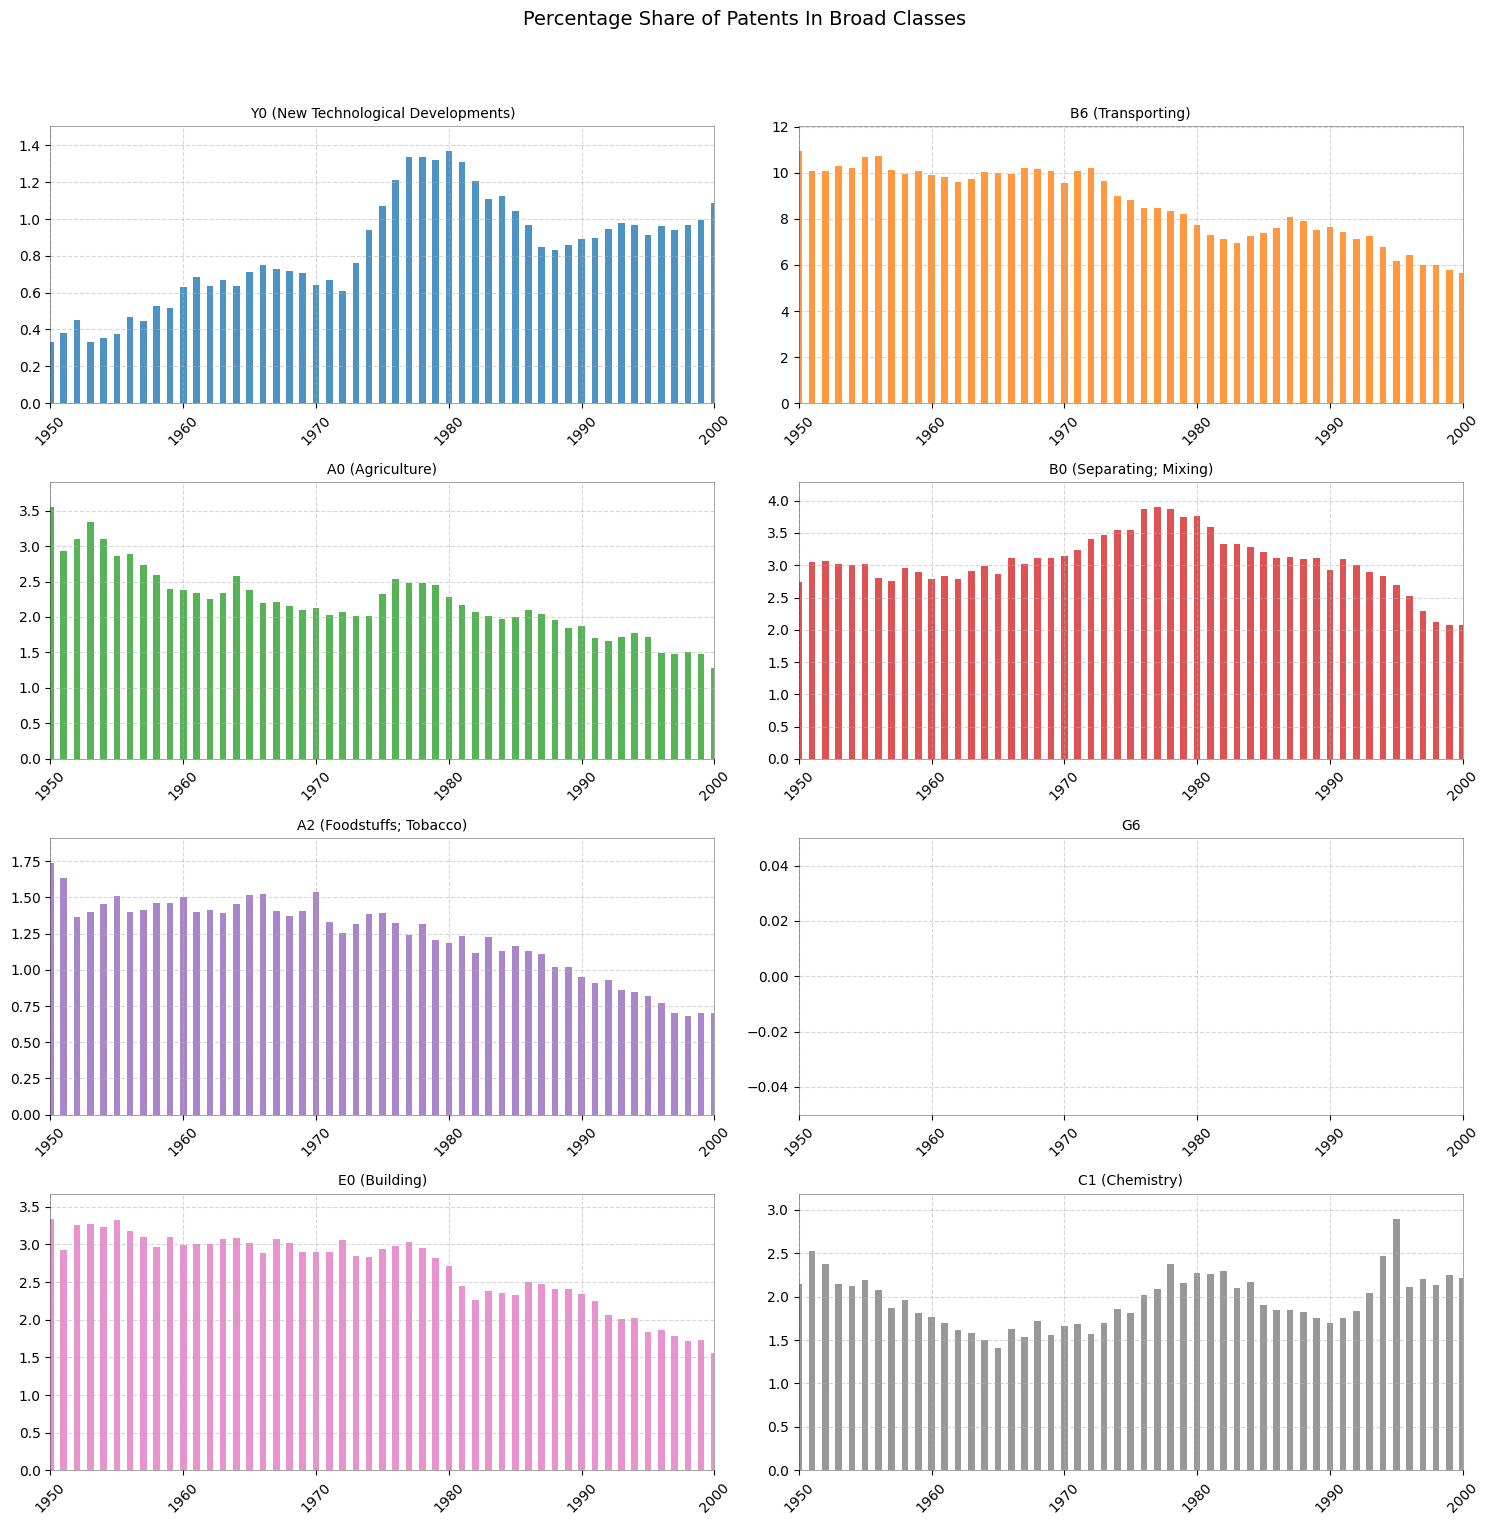

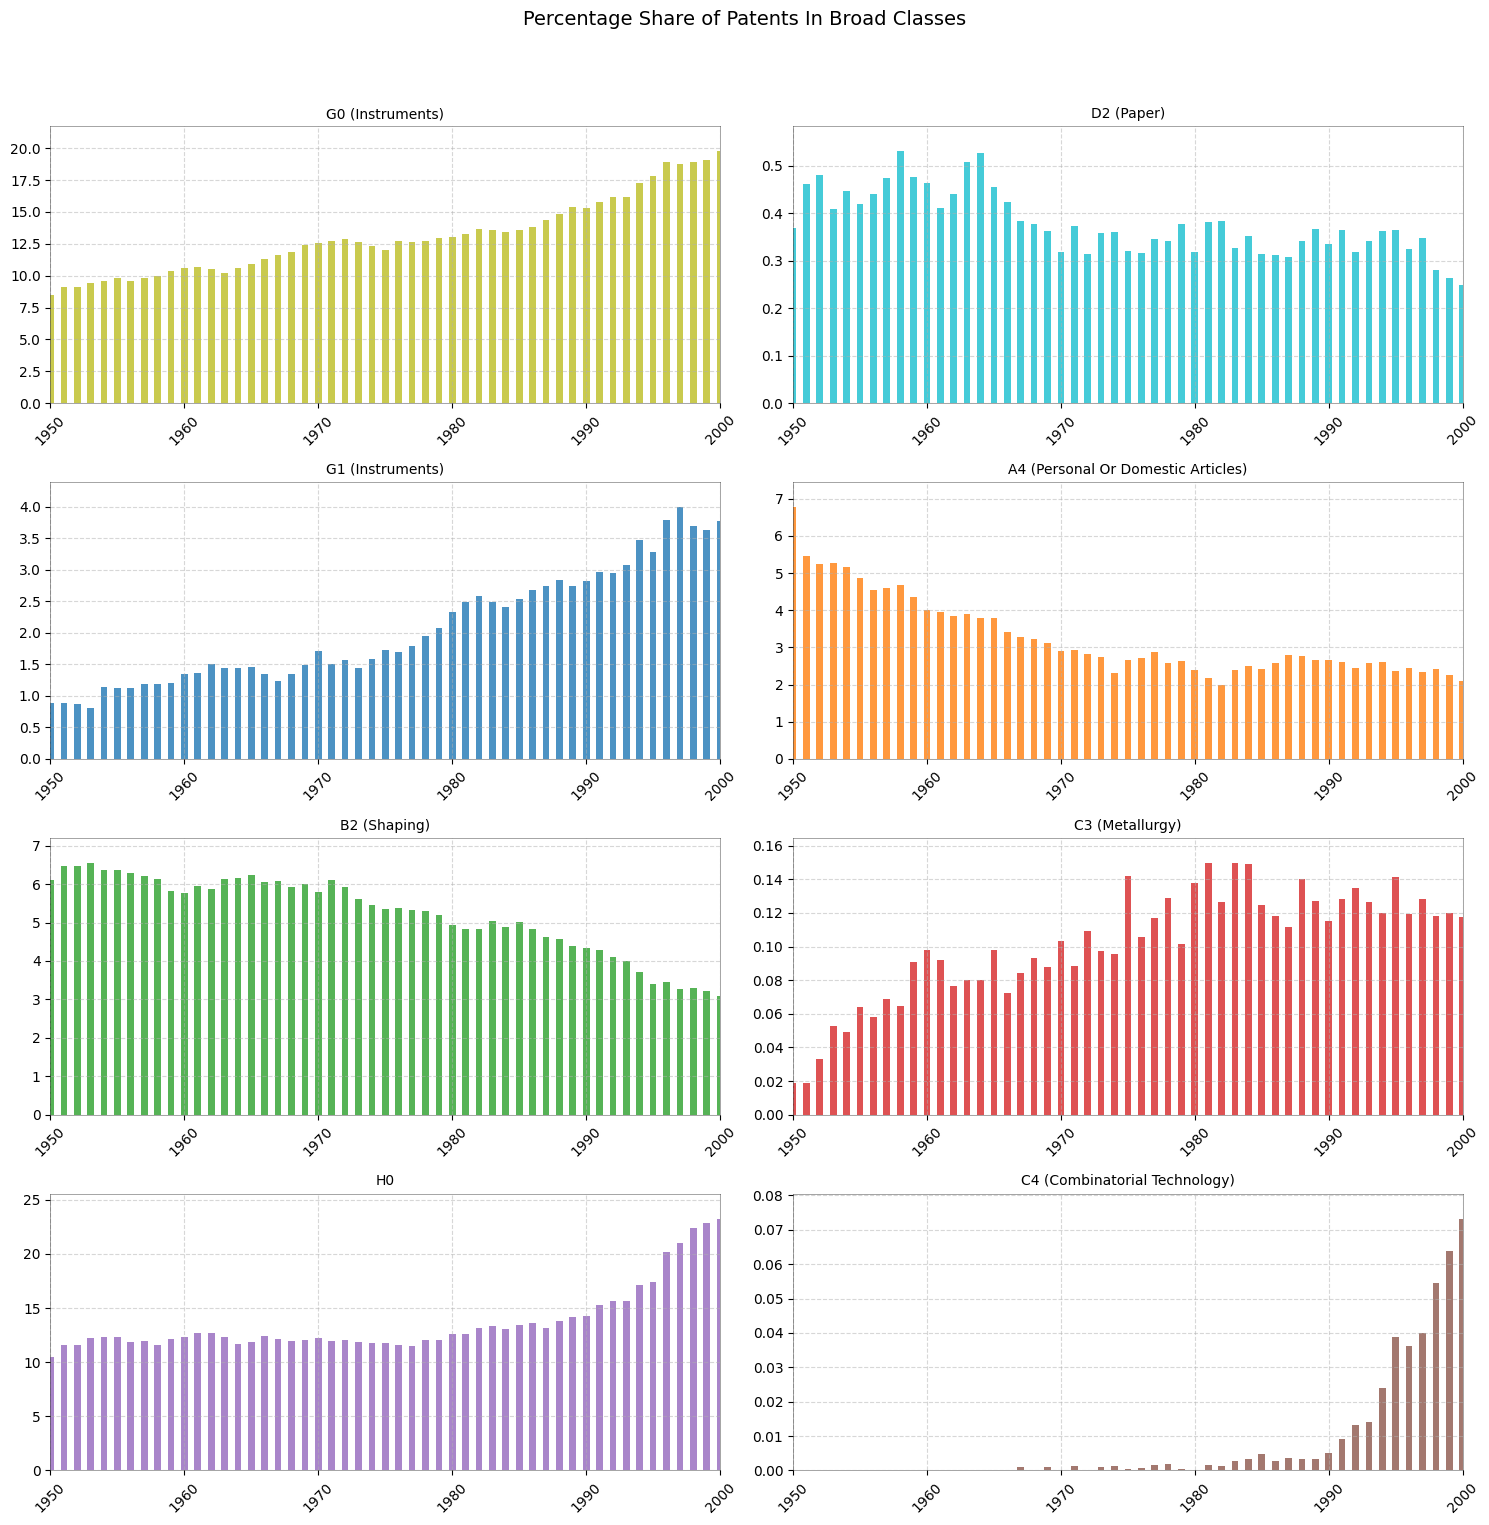

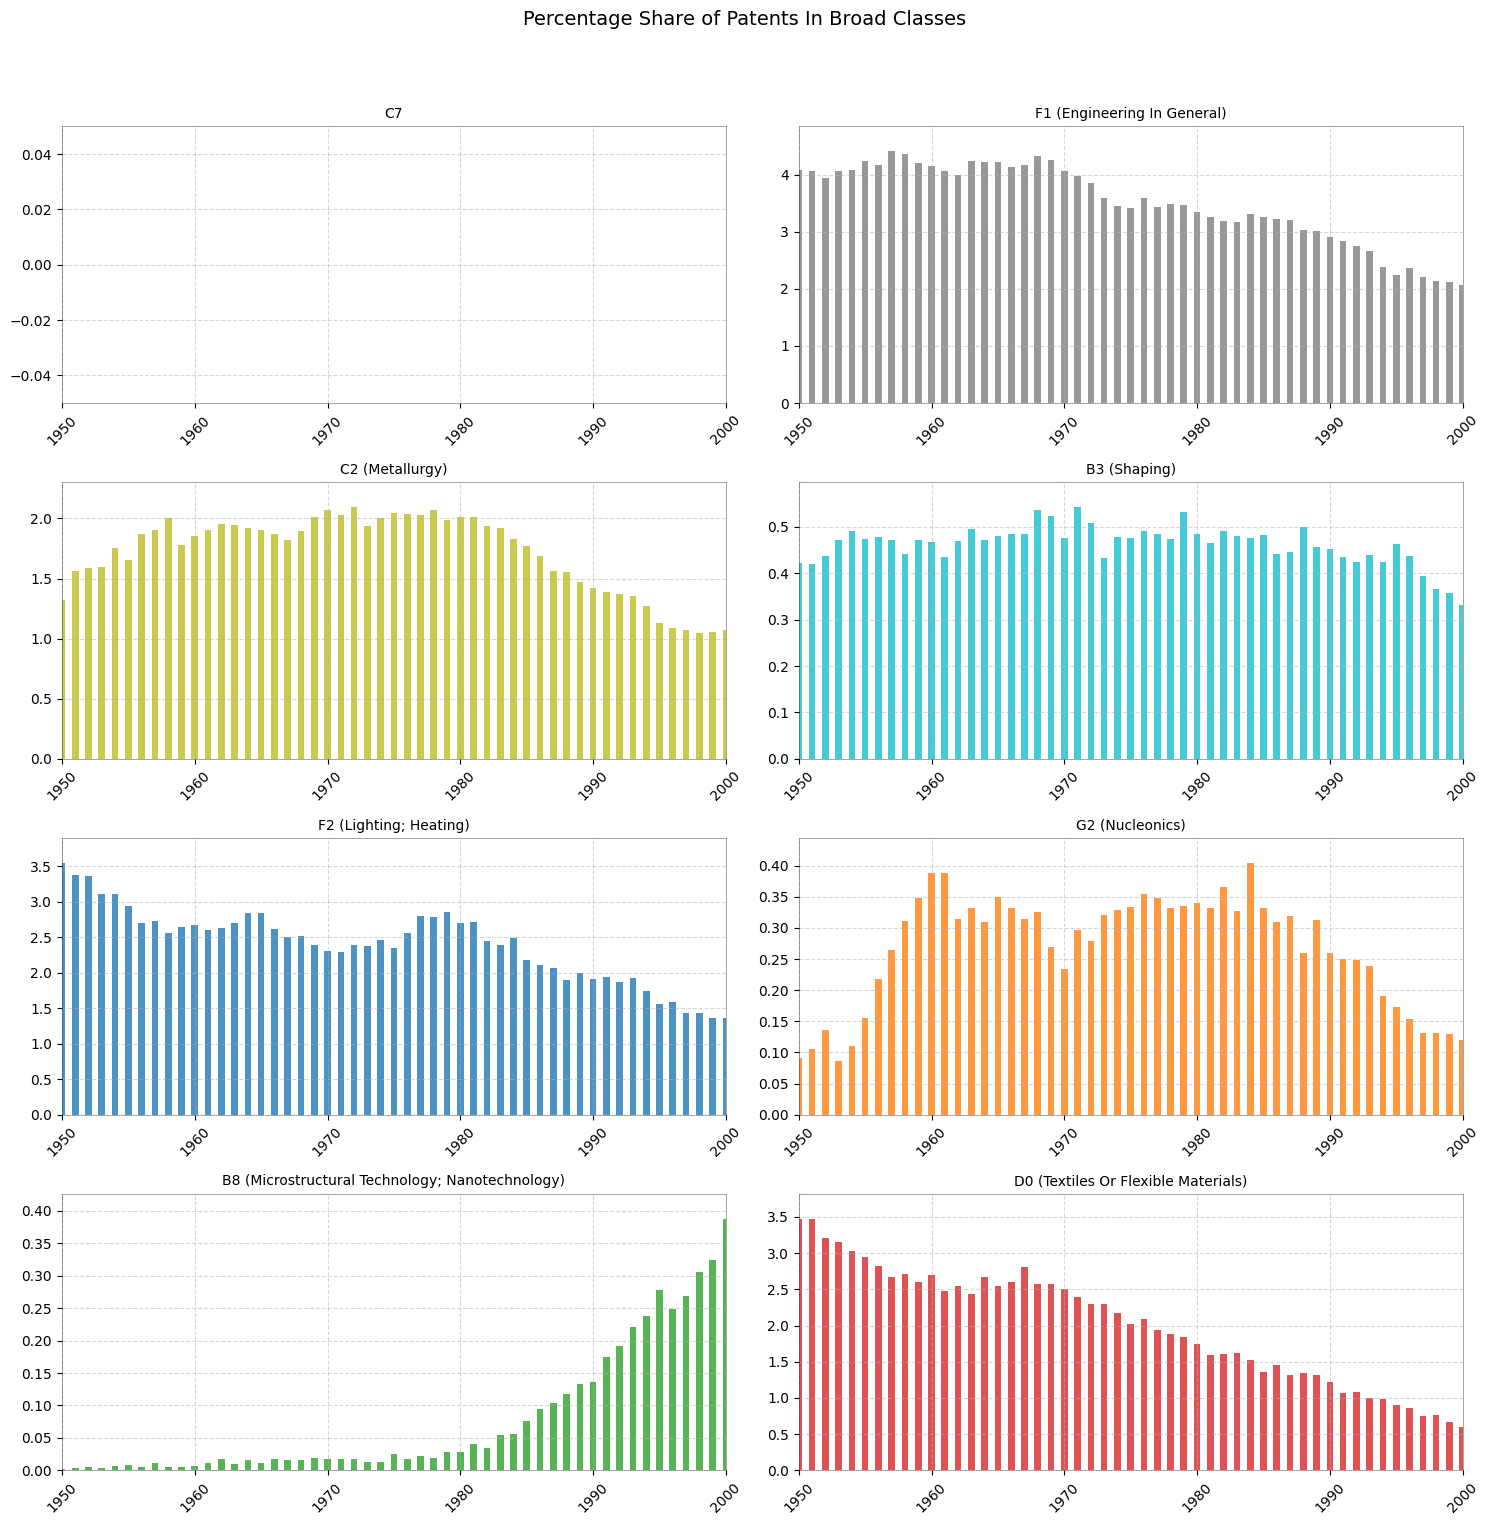

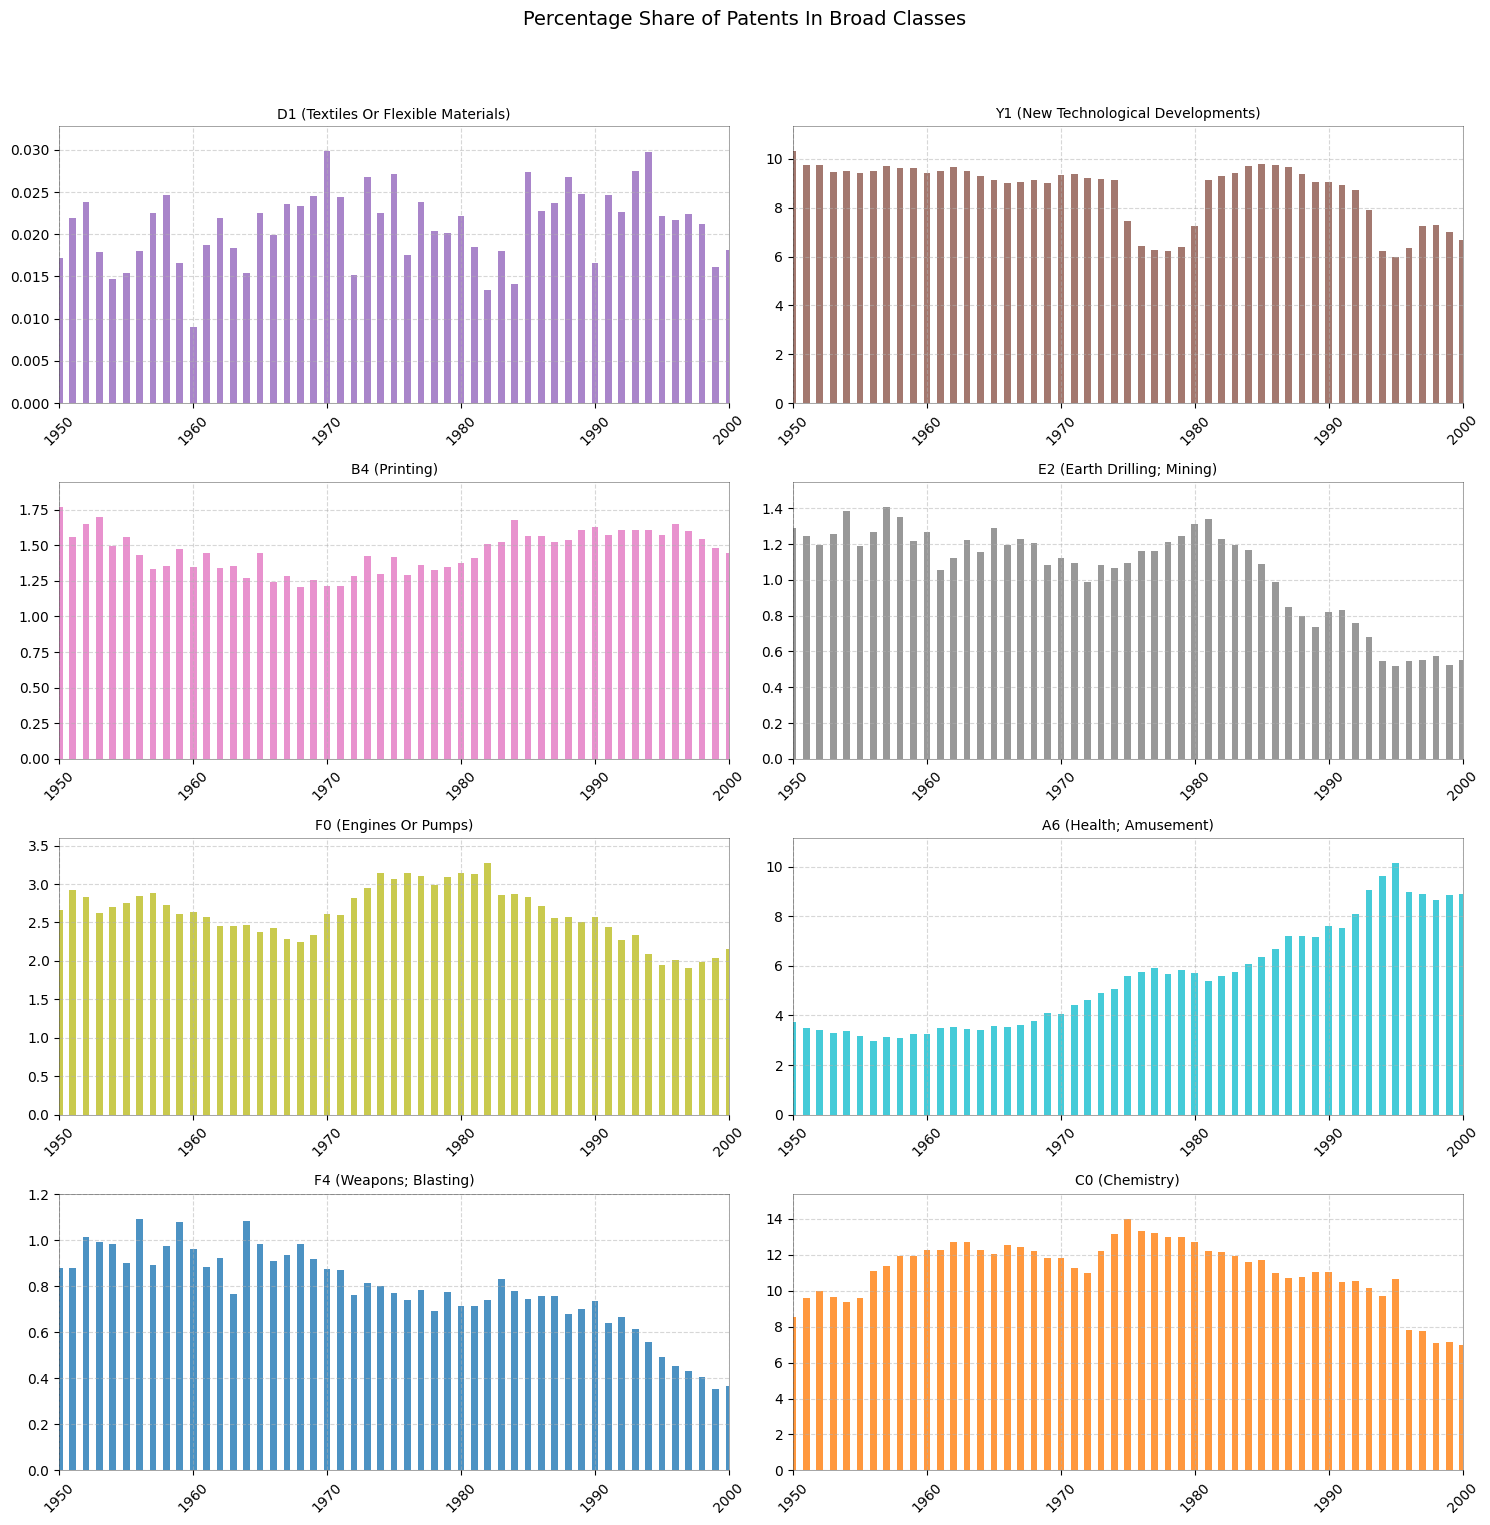

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the columns you want to plot
columns_to_plot = [column for column in summed_df.columns]

# Define the color list for each figure
figure_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Customize the x-axis ticks to appear every 10 years starting from 1840
start_year = 1950
end_year = 2000
tick_positions = range(start_year, end_year + 1, 10)

# Calculate the number of subplots needed
num_plots = len(columns_to_plot)
num_rows = 4
num_cols = 2
num_figures = (num_plots - 1) // (num_rows * num_cols) + 1

# Iterate through figures
for f in range(num_figures):
    # Create a new figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 16))
    fig.suptitle('Percentage Share of Patents In Broad Classes', fontsize=14)

    # Iterate through subplots in the current figure
    for i, ax in enumerate(axes.flat):
        # Calculate the index of the current column
        column_idx = f * (num_rows * num_cols) + i

        # Check if the column index is within the range of columns to plot
        if column_idx < num_plots:
            # Get the column name
            column = columns_to_plot[column_idx]

            # Find the name corresponding to the current column
            try:
                name_of_column = df_name.loc[df_name['code'] == column, 'name'].values[0]
            except IndexError:
                name_of_column = None  # If code is not found, set name_of_column to None

            # Plot the bar chart with the color specified for the current figure
            ax.bar(summed_df.index, summed_df[column] * 100, color=figure_colors[column_idx % 10], width=0.5, alpha=0.8)

            # Set x-axis limits and ticks
            ax.set_xlim(start_year, end_year)
            ax.set_xticks(tick_positions)
            ax.set_xticklabels(tick_positions, rotation=45)  # Rotate x-axis labels for better readability

            # Filter data between 1840 and 2014 for the specified column
            filtered_data = summed_df.loc[(summed_df.index >= start_year) & (summed_df.index <= end_year), column]

            # Calculate the maximum y-axis limit for the current plot
            max_share = (filtered_data * 100).max() * 1.1

            # Set y-axis limit
            ax.set_ylim([0, max_share])

            # Determine the title for the current subplot
            if name_of_column:
                subplot_title = f'{column} ({name_of_column})'
            else:
                subplot_title = f'{column}'

            # Add title for the subplot
            ax.set_title(subplot_title, fontsize=10)

            # Add a light grid
            ax.grid(axis='y', linestyle='--', alpha=0.5)
            ax.grid(axis='x', linestyle='--', alpha=0.5)
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(0.5)
                spine.set_alpha(0.5)
        else:
            # If the column index is out of range, remove the subplot
            fig.delaxes(ax)

    # Adjust layout to prevent cropping and display the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig(f'{f}_Patents.png', dpi=300)
    plt.show()
    #files.download(f'{f}_Patents.png')

In [ ]:
# Copy 'filed_year' from df
#filed_year_column = df['filed_year'].copy()

# Create a new DataFrame to store the summed values
new_df = pd.DataFrame()

# Iterate through unique_combinations, group by the combination, and sum the values for each year
for combination in unique_combinations:
    related_columns = [col for col in df2.columns if col.startswith(combination)]
    summed_values = df2.groupby('filed_year')[related_columns].sum()
    new_df[combination] = summed_values.sum(axis=1)

new_df = new_df.drop(new_df.index[-1])

# Reset the index to convert 'filed_year' to a regular column
new_df = new_df.reset_index()

# Change the format of 'filed_year' to integer
new_df['filed_year'] = new_df['filed_year'].astype(int)
new_df.set_index('filed_year', inplace=True)
# Display the resulting DataFrame
#bt_df['total_sum'] = bt_df.sum(axis=1)
new_df.head(20)

Y0    B6    A0    B0    A2   G6    E0    C1    G0   D2  ...   B8  \
filed_year                                                           ...        
1836        0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  ...  0.0   
1840        3.0   6.0   8.0   5.0   1.0  0.0   3.0   3.0   0.0  0.0  ...  0.0   
1841        0.0   2.0   9.0   4.0   0.0  0.0   3.0   0.0   0.0  0.0  ...  0.0   
1842        0.0   1.0   9.0   2.0   0.0  0.0   6.0   1.0   4.0  0.0  ...  0.0   
1843        0.0   6.0  12.0   5.0   1.0  0.0   4.0   0.0   7.0  2.0  ...  0.0   
1844        0.0  10.0   3.0   3.0   1.0  0.0   5.0   2.0   2.0  0.0  ...  0.0   
1845        0.0   9.0   2.0   5.0   1.0  0.0  10.0   1.0   2.0  2.0  ...  0.0   
1846        0.0  21.0  12.0   5.0   0.0  0.0  10.0   1.0   9.0  2.0  ...  0.0   
1847        0.0  17.0   8.0   2.0   0.0  0.0  13.0   3.0   4.0  0.0  ...  0.0   
1848        0.0  12.0   8.0   3.0   0.0  0.0  13.0   1.0   2.0  1.0  ...  0.0   
1849        3.0  25.0  17.0   8.0   2.0  0.0   7.0   2.0   9.0  0.0  ...  0.0   
1850        1.0  19.0  19.0   4.0   1.0  0.0   9.0   4.0  13.0  1.0  ...  0.0   
1851        0.0  15.0  14.0   3.0   1.0  0.0   5.0   1.0   2.0  0.0  ...  0.0   
1852        0.0  13.0  16.0   4.0   1.0  0.0   5.0  10.0  10.0  0.0  ...  0.0   
1853        2.0  16.0  19.0   2.0   1.0  0.0   5.0   5.0   5.0  0.0  ...  0.0   
1854        2.0  22.0  41.0  19.0   2.0  0.0  15.0  12.0  11.0  0.0  ...  0.0   
1855        5.0  39.0  61.0  16.0   3.0  0.0  12.0  19.0   3.0  1.0  ...  0.0   
1856        0.0  41.0  61.0  18.0   5.0  0.0  22.0  18.0  10.0  2.0  ...  0.0   
1857        0.0  45.0  60.0  15.0   7.0  0.0  34.0  25.0   3.0  1.0  ...  0.0   
1858        0.0  62.0  68.0  24.0  12.0  0.0  33.0  19.0  16.0  3.0  ...  0.0   

              D0   D1    Y1   B4   E2    F0    A6    F4    C0  
filed_year                                                     
1836         0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0  
1840         3.0  0.0   2.0  1.0  0.0   7.0   1.0   1.0   0.0  
1841         3.0  0.0  11.0  3.0  0.0   1.0   2.0   1.0   2.0  
1842        16.0  0.0  15.0  3.0  0.0   0.0   0.0   0.0   2.0  
1843         6.0  0.0  18.0  4.0  1.0   0.0   3.0   1.0   2.0  
1844         4.0  0.0  29.0  2.0  0.0   1.0   6.0   4.0   0.0  
1845        15.0  0.0  31.0  9.0  0.0   2.0   4.0   1.0   3.0  
1846        11.0  0.0  33.0  2.0  0.0   0.0   0.0   1.0   1.0  
1847         6.0  0.0  34.0  4.0  0.0   3.0   4.0   6.0   3.0  
1848         7.0  0.0  37.0  3.0  1.0   2.0   5.0   6.0   3.0  
1849        13.0  0.0  37.0  5.0  2.0   2.0   5.0  15.0   3.0  
1850        11.0  0.0  26.0  5.0  1.0   4.0   5.0   9.0   7.0  
1851        10.0  0.0  29.0  4.0  0.0   5.0   2.0   5.0   4.0  
1852        11.0  0.0  22.0  1.0  0.0   6.0   2.0   9.0   6.0  
1853         9.0  0.0  14.0  0.0  0.0   8.0   1.0   5.0   4.0  
1854        19.0  0.0  38.0  1.0  0.0  14.0   3.0  25.0  13.0  
1855        10.0  0.0  21.0  1.0  0.0  10.0   6.0  24.0   6.0  
1856        13.0  0.0  45.0  3.0  1.0   4.0  20.0  31.0  15.0  
1857        21.0  0.0  30.0  2.0  0.0   6.0  30.0  22.0  32.0  
1858        31.0  0.0  60.0  2.0  1.0   7.0  12.0   5.0  31.0  

[20 rows x 32 columns]

<ipython-input-28-f52ba951c43d>:59: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, max_share])


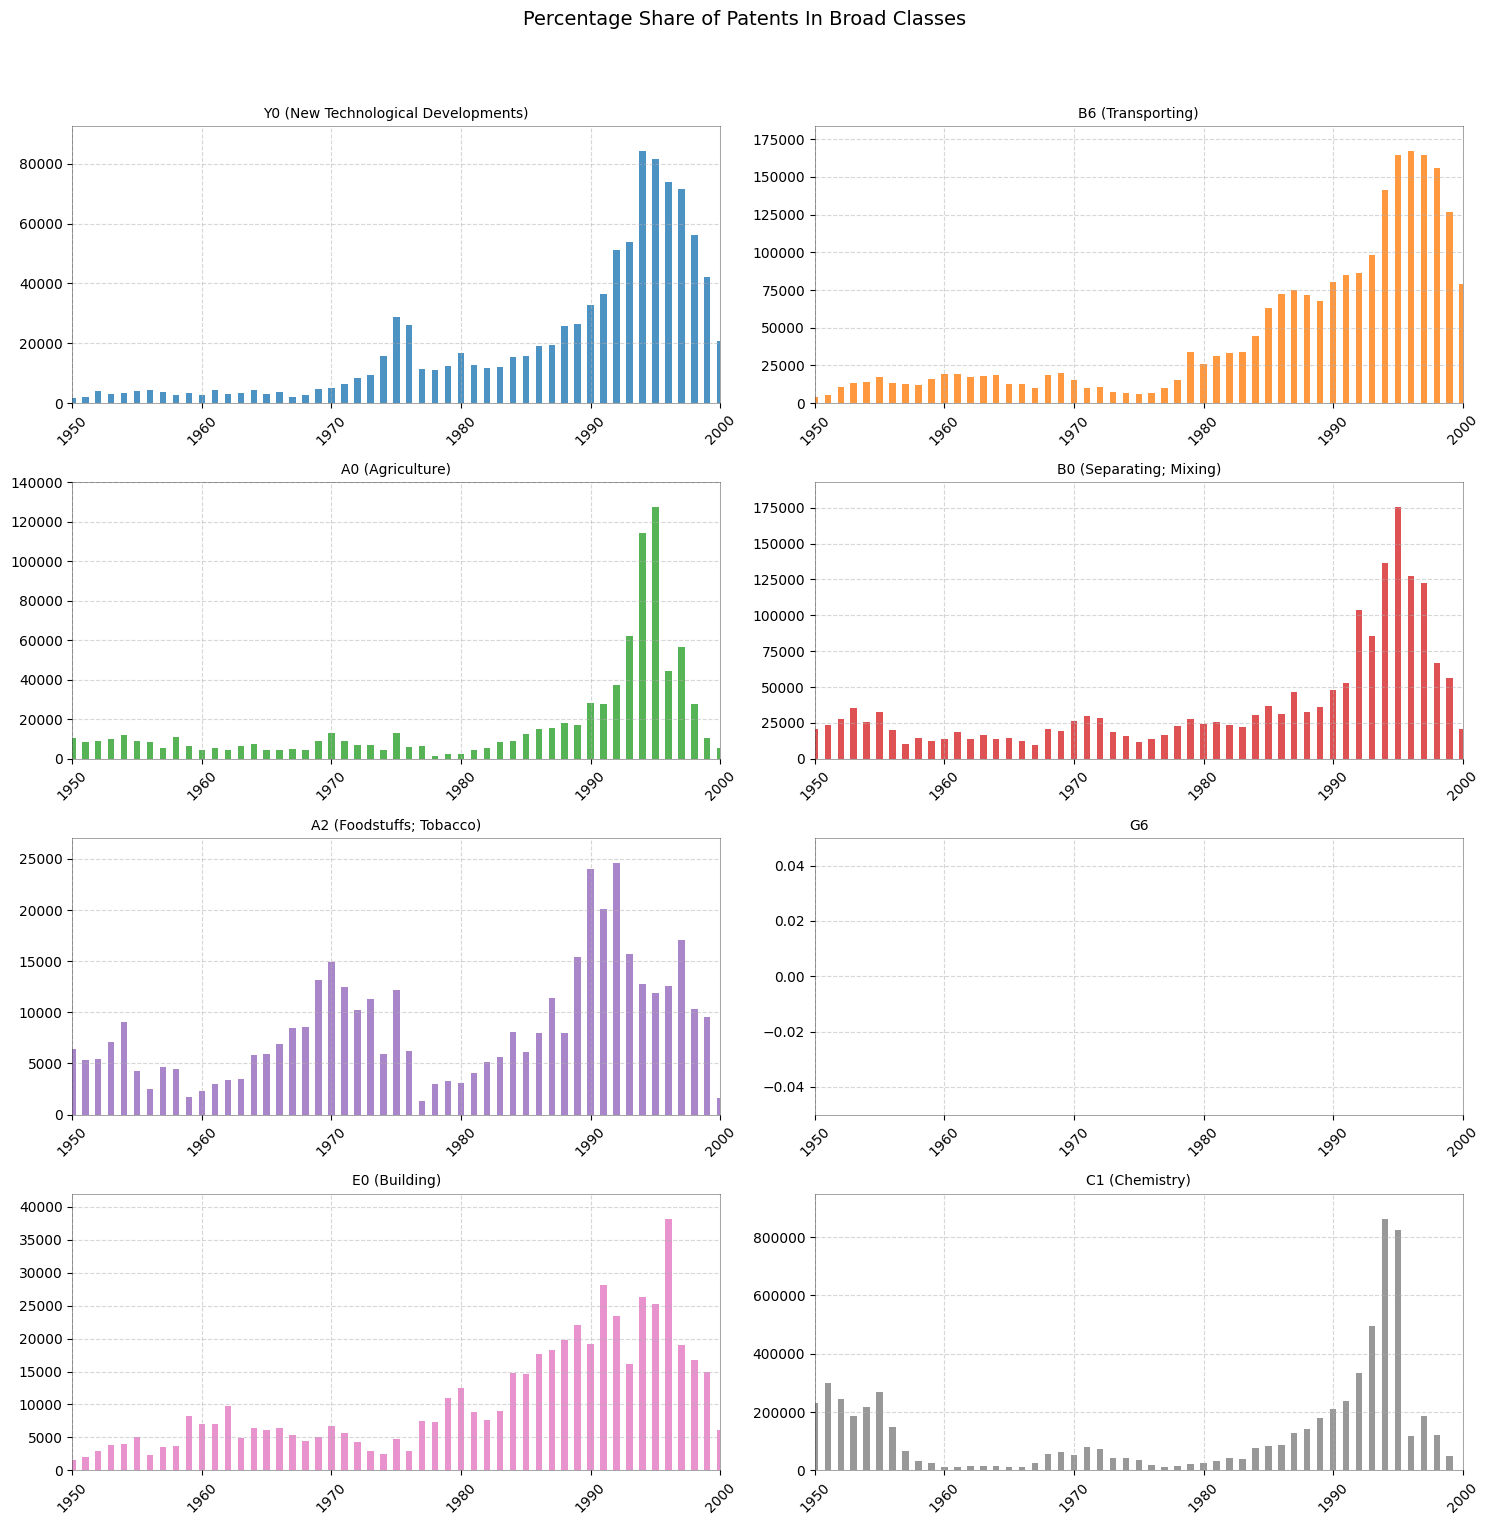

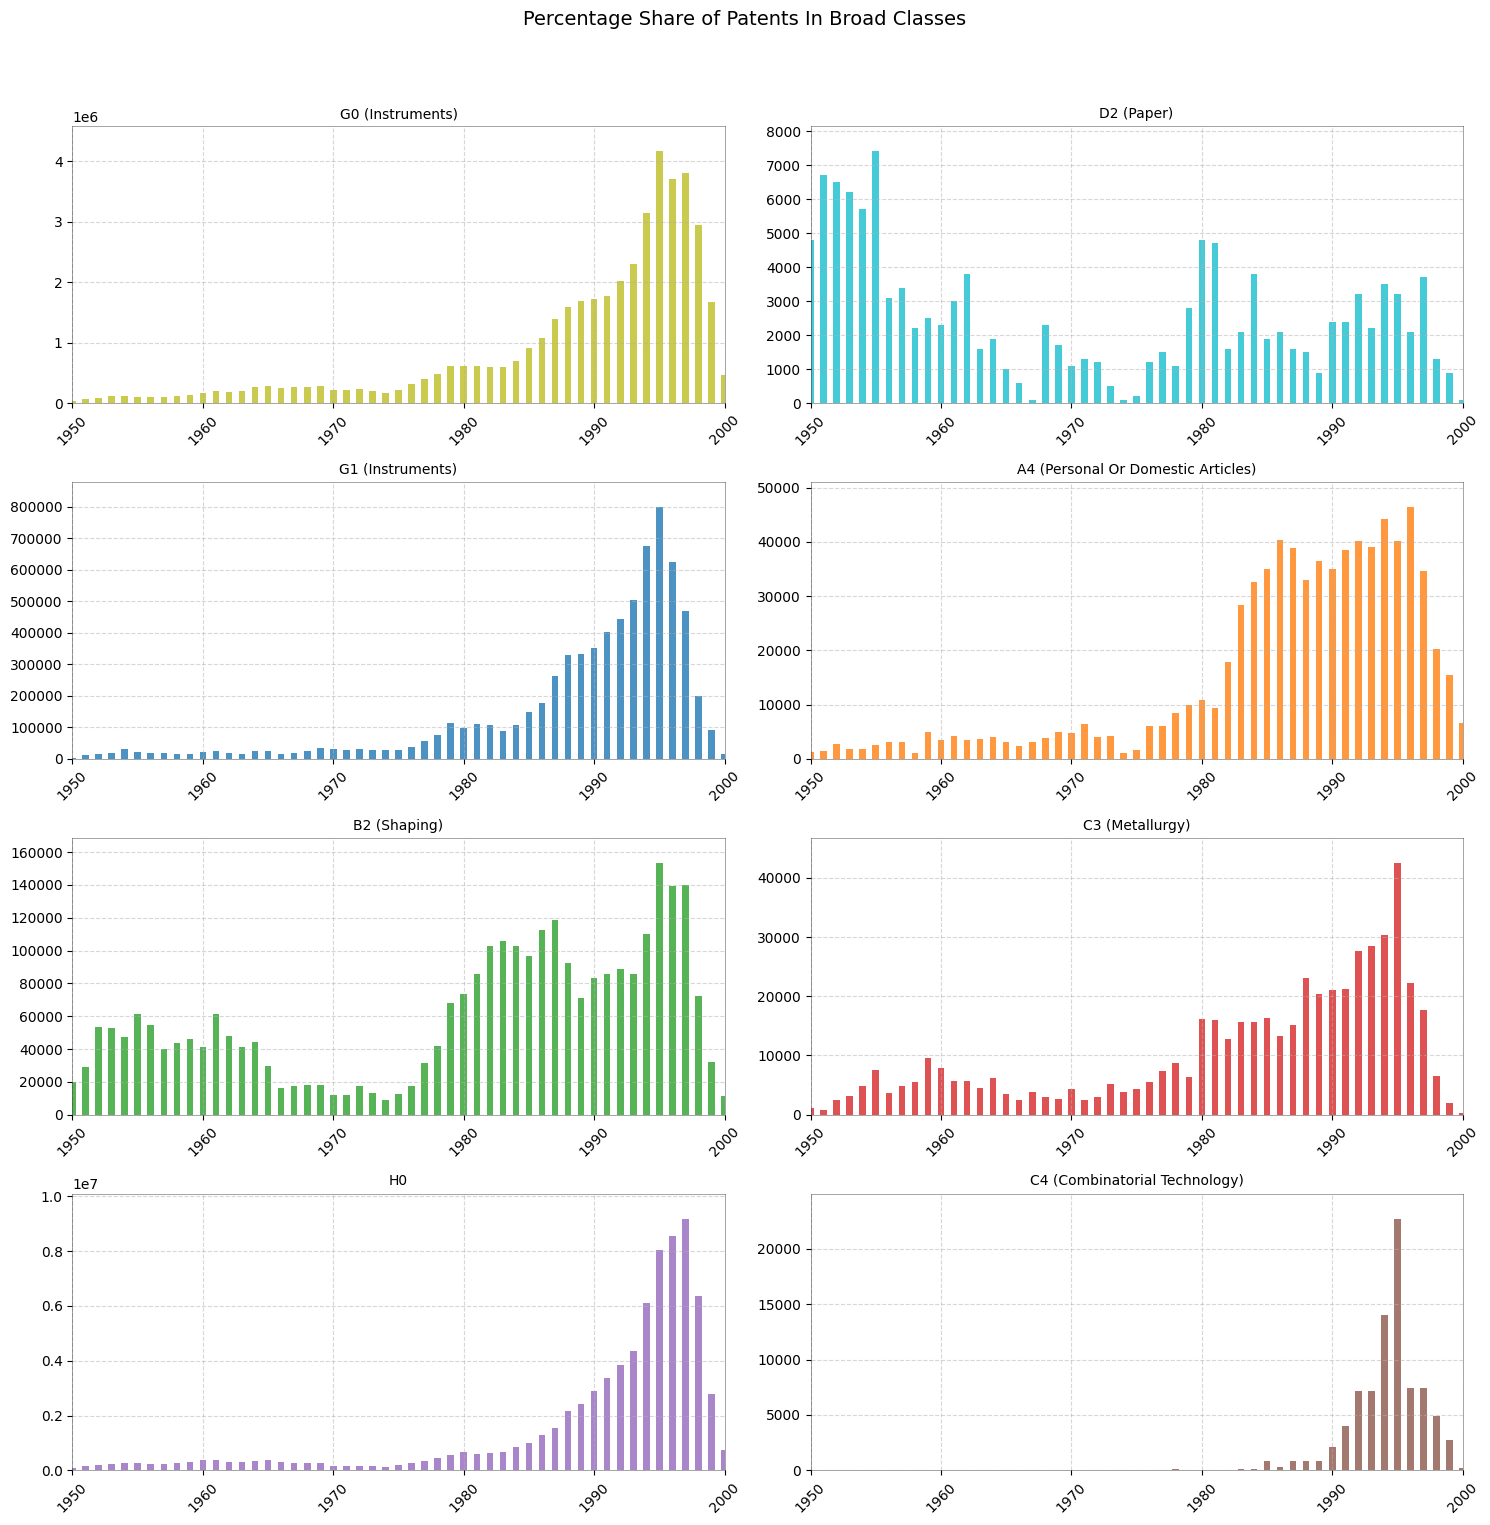

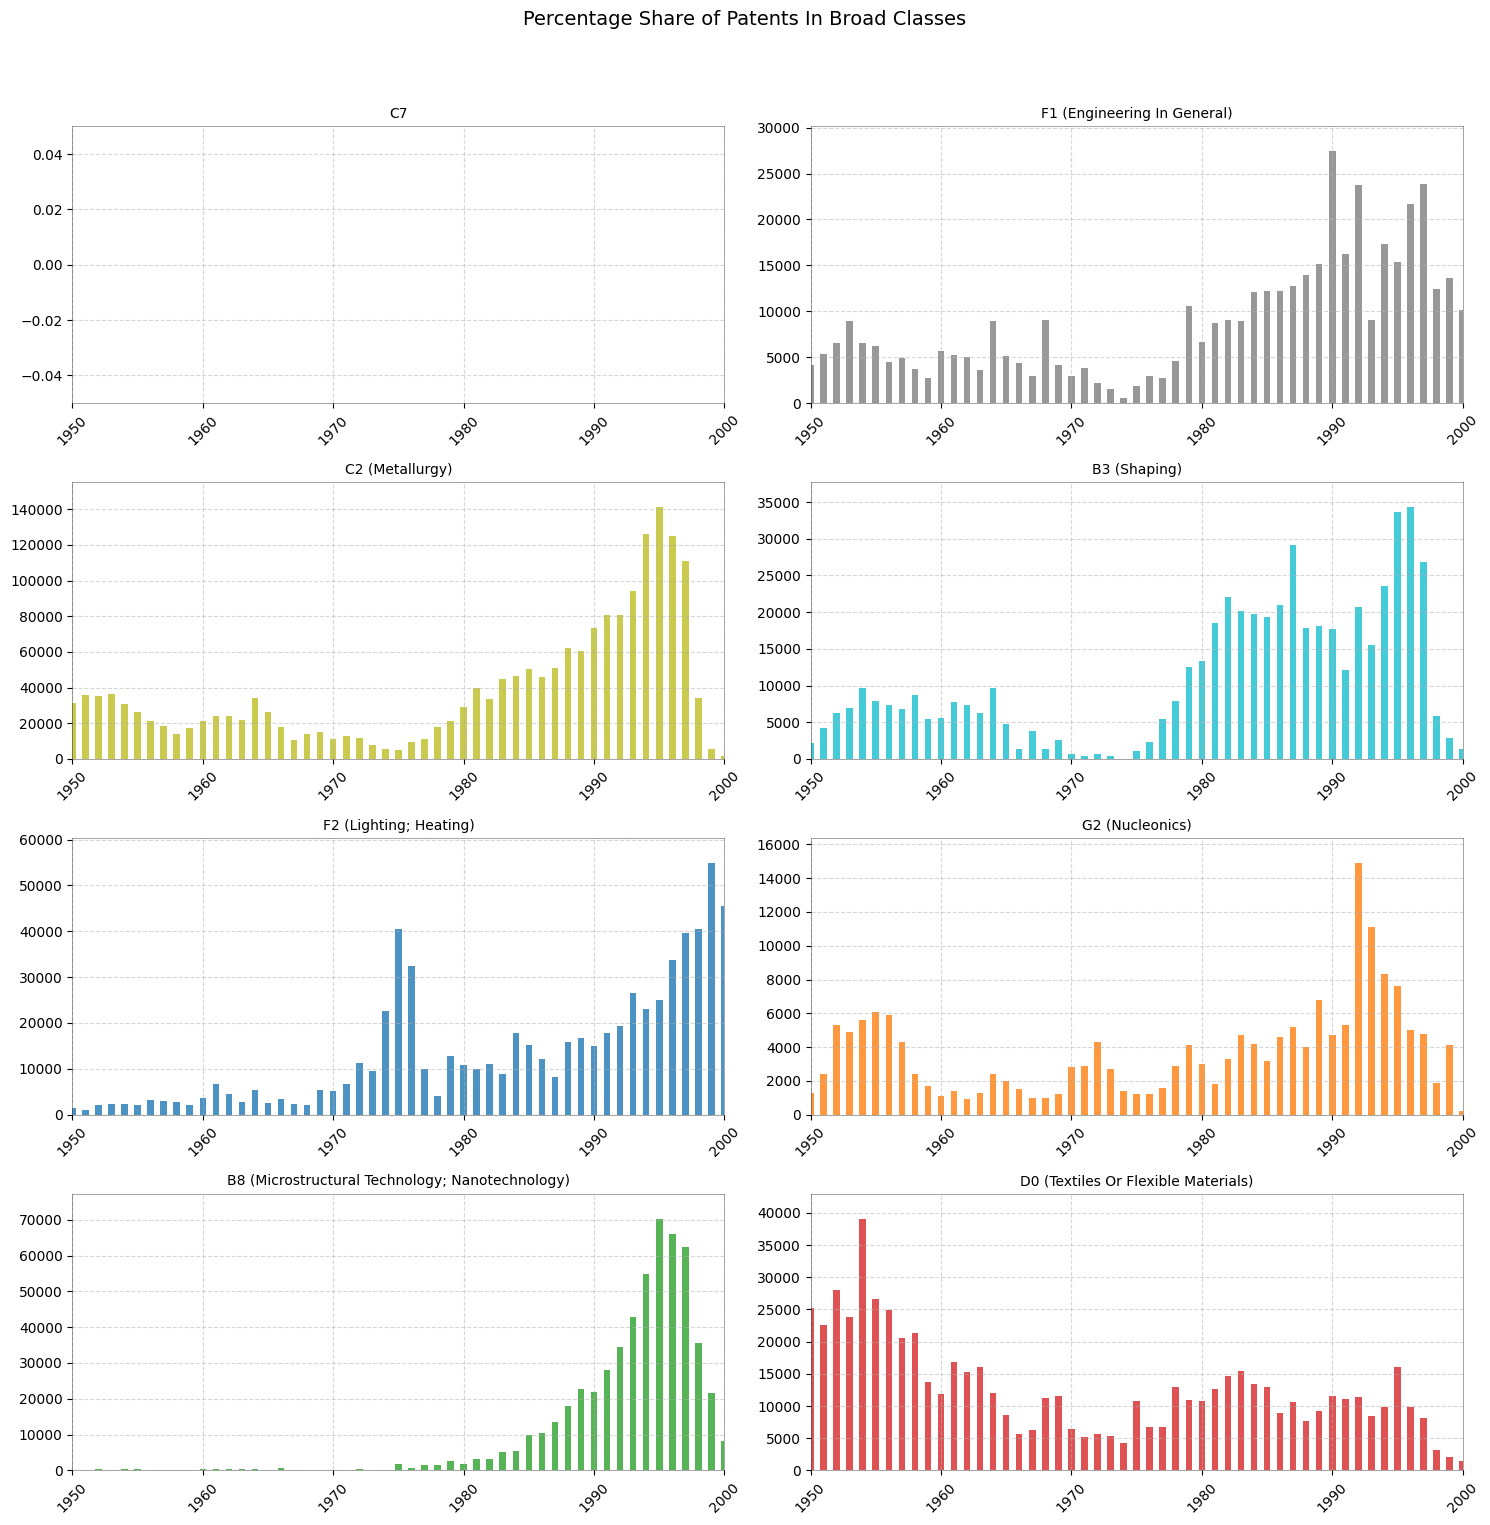

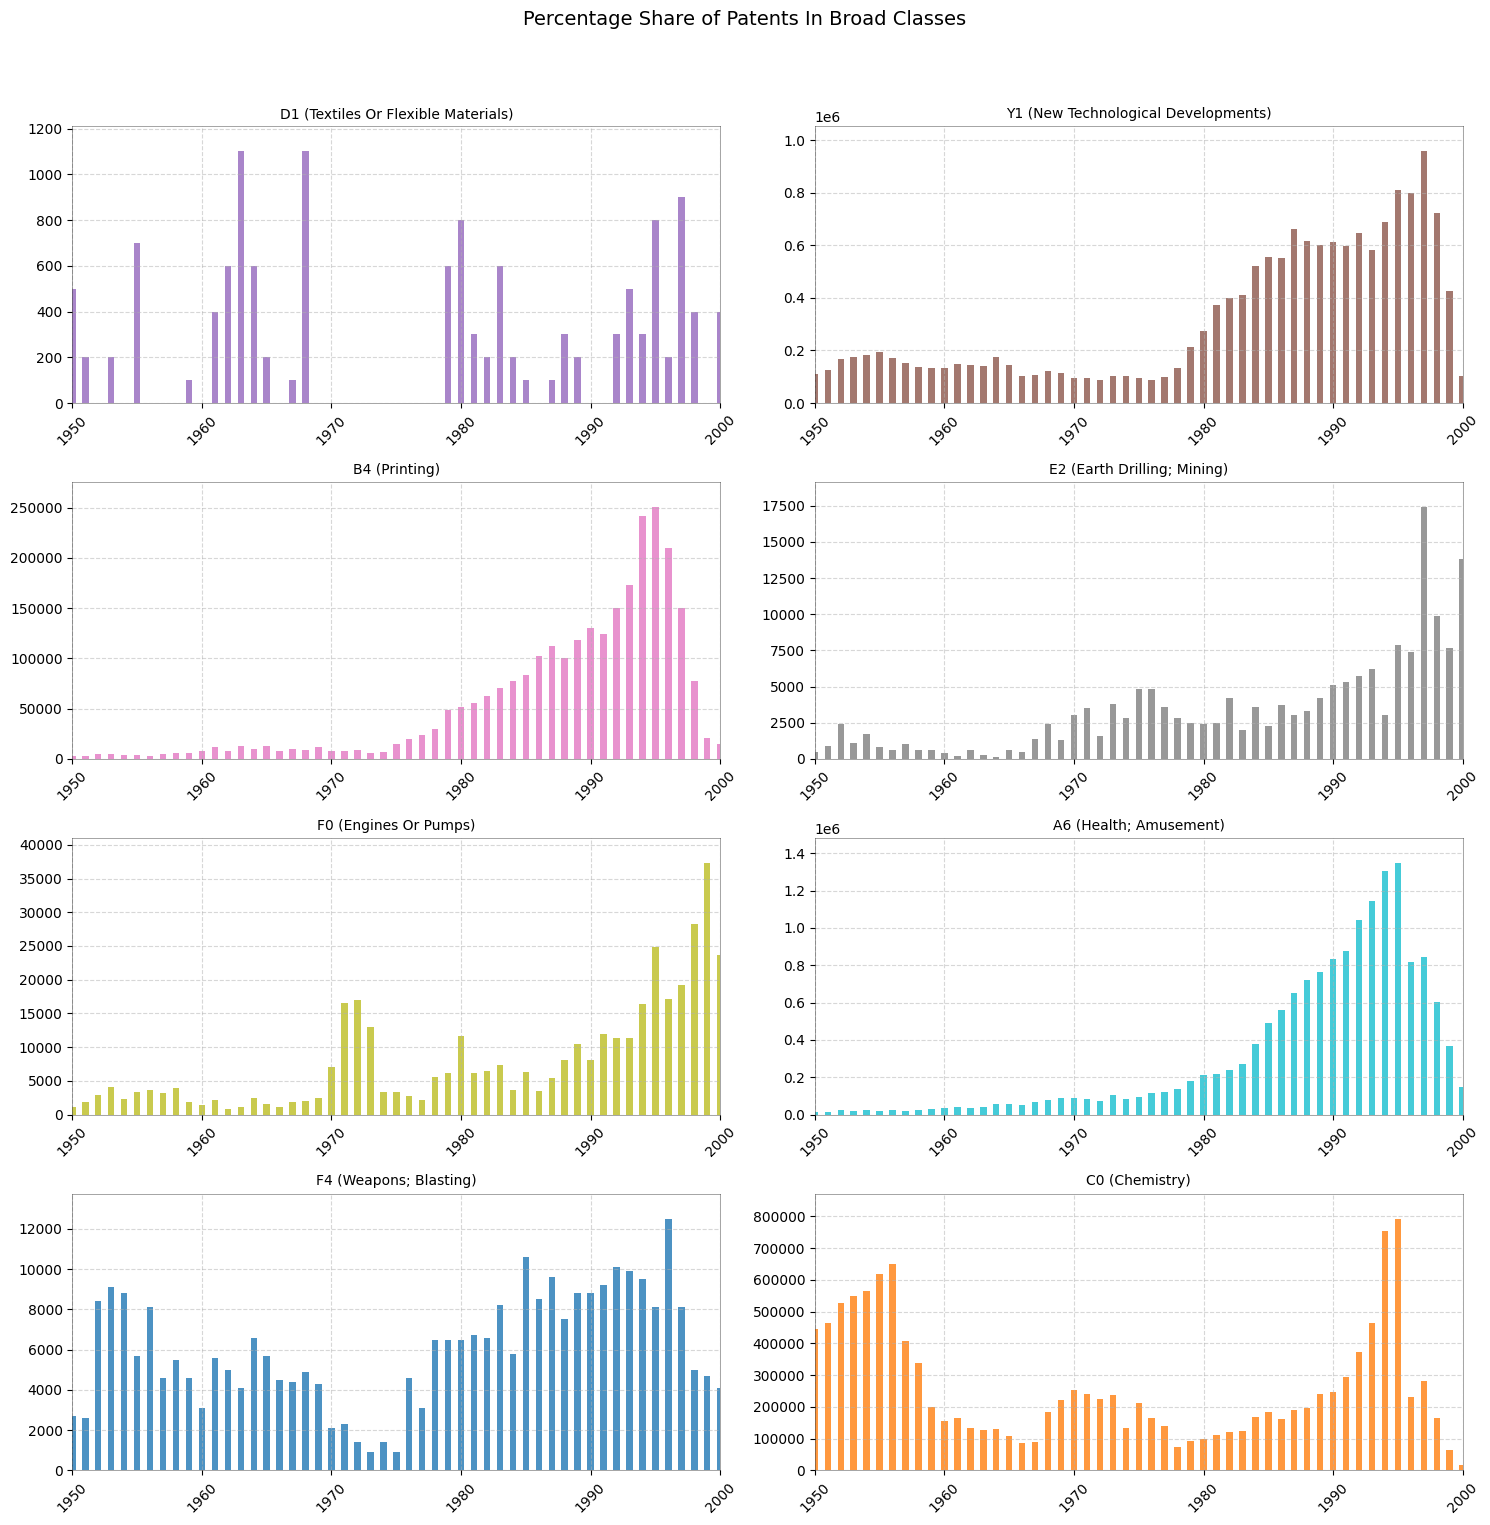

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the columns you want to plot
columns_to_plot = [column for column in new_df.columns]

# Define the color list for each figure
figure_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Customize the x-axis ticks to appear every 10 years starting from 1840
start_year = 1950
end_year = 2000
tick_positions = range(start_year, end_year + 1, 10)

# Calculate the number of subplots needed
num_plots = len(columns_to_plot)
num_rows = 4
num_cols = 2
num_figures = (num_plots - 1) // (num_rows * num_cols) + 1

# Iterate through figures
for f in range(num_figures):
    # Create a new figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 16))
    fig.suptitle('Percentage Share of Patents In Broad Classes', fontsize=14)

    # Iterate through subplots in the current figure
    for i, ax in enumerate(axes.flat):
        # Calculate the index of the current column
        column_idx = f * (num_rows * num_cols) + i

        # Check if the column index is within the range of columns to plot
        if column_idx < num_plots:
            # Get the column name
            column = columns_to_plot[column_idx]

            # Find the name corresponding to the current column
            try:
                name_of_column = df_name.loc[df_name['code'] == column, 'name'].values[0]
            except IndexError:
                name_of_column = None  # If code is not found, set name_of_column to None

            # Plot the bar chart with the color specified for the current figure
            ax.bar(new_df.index, new_df[column] * 100, color=figure_colors[column_idx % 10], width=0.5, alpha=0.8)

            # Set x-axis limits and ticks
            ax.set_xlim(start_year, end_year)
            ax.set_xticks(tick_positions)
            ax.set_xticklabels(tick_positions, rotation=45)  # Rotate x-axis labels for better readability

            # Filter data between 1840 and 2014 for the specified column
            filtered_data = new_df.loc[(new_df.index >= start_year) & (new_df.index <= end_year), column]

            # Calculate the maximum y-axis limit for the current plot
            max_share = (filtered_data * 100).max() * 1.1

            # Set y-axis limit
            ax.set_ylim([0, max_share])

            # Determine the title for the current subplot
            if name_of_column:
                subplot_title = f'{column} ({name_of_column})'
            else:
                subplot_title = f'{column}'

            # Add title for the subplot
            ax.set_title(subplot_title, fontsize=10)

            # Add a light grid
            ax.grid(axis='y', linestyle='--', alpha=0.5)
            ax.grid(axis='x', linestyle='--', alpha=0.5)
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(0.5)
                spine.set_alpha(0.5)
        else:
            # If the column index is out of range, remove the subplot
            fig.delaxes(ax)

    # Adjust layout to prevent cropping and display the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig(f'{f}_Patents.png', dpi=300)
    plt.show()
    #files.download(f'{f}_Patents.png')

In [ ]:
upload = files.upload()
df2 = pd.read_stata('/content/Breakthrough_vahid.dta')

Saving Breakthrough_vahid.dta to Breakthrough_vahid.dta


In [ ]:
df2.dropna(subset=['filed_year'], inplace=True)
df2['filed_year'] = df2['filed_year'].astype(int)
df2.set_index('filed_year', inplace=True)
#df['total_sum'] = df.sum(axis=1)

In [ ]:
df2.head()

A01  A21  A22  A23  A24  A41  A42  A43  A44  A45  ...  G21  G60  \
filed_year                                                     ...             
1836         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1840         8.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  0.0  ...  0.0  0.0   
1841         9.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1842         9.0  0.0  0.0  0.0  0.0  0.0  1.0  4.0  1.0  1.0  ...  0.0  0.0   
1843        12.0  0.0  0.0  1.0  0.0  1.0  1.0  2.0  1.0  0.0  ...  0.0  0.0   

            H01  H02  H03  H04  H05  Y02  Y04   Y10  
filed_year                                           
1836        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
1840        0.0  0.0  0.0  0.0  0.0  3.0  0.0   2.0  
1841        0.0  0.0  0.0  0.0  0.0  0.0  0.0  11.0  
1842        0.0  0.0  0.0  0.0  0.0  0.0  0.0  15.0  
1843        1.0  2.0  0.0  0.0  0.0  0.0  0.0  18.0  

[5 rows x 129 columns]

In [ ]:
# Copy 'filed_year' from df
#filed_year_column = df['filed_year'].copy()

# Create a new DataFrame to store the summed values
bt_df = pd.DataFrame()

# Iterate through unique_combinations, group by the combination, and sum the values for each year
for combination in unique_combinations:
    related_columns = [col for col in df2.columns if col.startswith(combination)]
    summed_values = df2.groupby('filed_year')[related_columns].sum()
    bt_df[combination] = summed_values.sum(axis=1)

bt_df = bt_df.drop(bt_df.index[-1])

# Reset the index to convert 'filed_year' to a regular column
bt_df = bt_df.reset_index()

# Change the format of 'filed_year' to integer
bt_df['filed_year'] = bt_df['filed_year'].astype(int)
bt_df.set_index('filed_year', inplace=True)
# Display the resulting DataFrame
#bt_df['total_sum'] = bt_df.sum(axis=1)
bt_df.head(20)

Y0    B6    A0    B0    A2   G6    E0    C1    G0   D2  ...   B8  \
filed_year                                                           ...        
1836        0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0  ...  0.0   
1840        3.0   6.0   8.0   5.0   1.0  0.0   3.0   3.0   0.0  0.0  ...  0.0   
1841        0.0   2.0   9.0   4.0   0.0  0.0   3.0   0.0   0.0  0.0  ...  0.0   
1842        0.0   1.0   9.0   2.0   0.0  0.0   6.0   1.0   4.0  0.0  ...  0.0   
1843        0.0   6.0  12.0   5.0   1.0  0.0   4.0   0.0   7.0  2.0  ...  0.0   
1844        0.0  10.0   3.0   3.0   1.0  0.0   5.0   2.0   2.0  0.0  ...  0.0   
1845        0.0   9.0   2.0   5.0   1.0  0.0  10.0   1.0   2.0  2.0  ...  0.0   
1846        0.0  21.0  12.0   5.0   0.0  0.0  10.0   1.0   9.0  2.0  ...  0.0   
1847        0.0  17.0   8.0   2.0   0.0  0.0  13.0   3.0   4.0  0.0  ...  0.0   
1848        0.0  12.0   8.0   3.0   0.0  0.0  13.0   1.0   2.0  1.0  ...  0.0   
1849        3.0  25.0  17.0   8.0   2.0  0.0   7.0   2.0   9.0  0.0  ...  0.0   
1850        1.0  19.0  19.0   4.0   1.0  0.0   9.0   4.0  13.0  1.0  ...  0.0   
1851        0.0  15.0  14.0   3.0   1.0  0.0   5.0   1.0   2.0  0.0  ...  0.0   
1852        0.0  13.0  16.0   4.0   1.0  0.0   5.0  10.0  10.0  0.0  ...  0.0   
1853        2.0  16.0  19.0   2.0   1.0  0.0   5.0   5.0   5.0  0.0  ...  0.0   
1854        2.0  22.0  41.0  19.0   2.0  0.0  15.0  12.0  11.0  0.0  ...  0.0   
1855        5.0  39.0  61.0  16.0   3.0  0.0  12.0  19.0   3.0  1.0  ...  0.0   
1856        0.0  41.0  61.0  18.0   5.0  0.0  22.0  18.0  10.0  2.0  ...  0.0   
1857        0.0  45.0  60.0  15.0   7.0  0.0  34.0  25.0   3.0  1.0  ...  0.0   
1858        0.0  62.0  68.0  24.0  12.0  0.0  33.0  19.0  16.0  3.0  ...  0.0   

              D0   D1    Y1   B4   E2    F0    A6    F4    C0  
filed_year                                                     
1836         0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   0.0  
1840         3.0  0.0   2.0  1.0  0.0   7.0   1.0   1.0   0.0  
1841         3.0  0.0  11.0  3.0  0.0   1.0   2.0   1.0   2.0  
1842        16.0  0.0  15.0  3.0  0.0   0.0   0.0   0.0   2.0  
1843         6.0  0.0  18.0  4.0  1.0   0.0   3.0   1.0   2.0  
1844         4.0  0.0  29.0  2.0  0.0   1.0   6.0   4.0   0.0  
1845        15.0  0.0  31.0  9.0  0.0   2.0   4.0   1.0   3.0  
1846        11.0  0.0  33.0  2.0  0.0   0.0   0.0   1.0   1.0  
1847         6.0  0.0  34.0  4.0  0.0   3.0   4.0   6.0   3.0  
1848         7.0  0.0  37.0  3.0  1.0   2.0   5.0   6.0   3.0  
1849        13.0  0.0  37.0  5.0  2.0   2.0   5.0  15.0   3.0  
1850        11.0  0.0  26.0  5.0  1.0   4.0   5.0   9.0   7.0  
1851        10.0  0.0  29.0  4.0  0.0   5.0   2.0   5.0   4.0  
1852        11.0  0.0  22.0  1.0  0.0   6.0   2.0   9.0   6.0  
1853         9.0  0.0  14.0  0.0  0.0   8.0   1.0   5.0   4.0  
1854        19.0  0.0  38.0  1.0  0.0  14.0   3.0  25.0  13.0  
1855        10.0  0.0  21.0  1.0  0.0  10.0   6.0  24.0   6.0  
1856        13.0  0.0  45.0  3.0  1.0   4.0  20.0  31.0  15.0  
1857        21.0  0.0  30.0  2.0  0.0   6.0  30.0  22.0  32.0  
1858        31.0  0.0  60.0  2.0  1.0   7.0  12.0   5.0  31.0  

[20 rows x 32 columns]

<ipython-input-24-0fe38a0c8d94>:59: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, max_share])


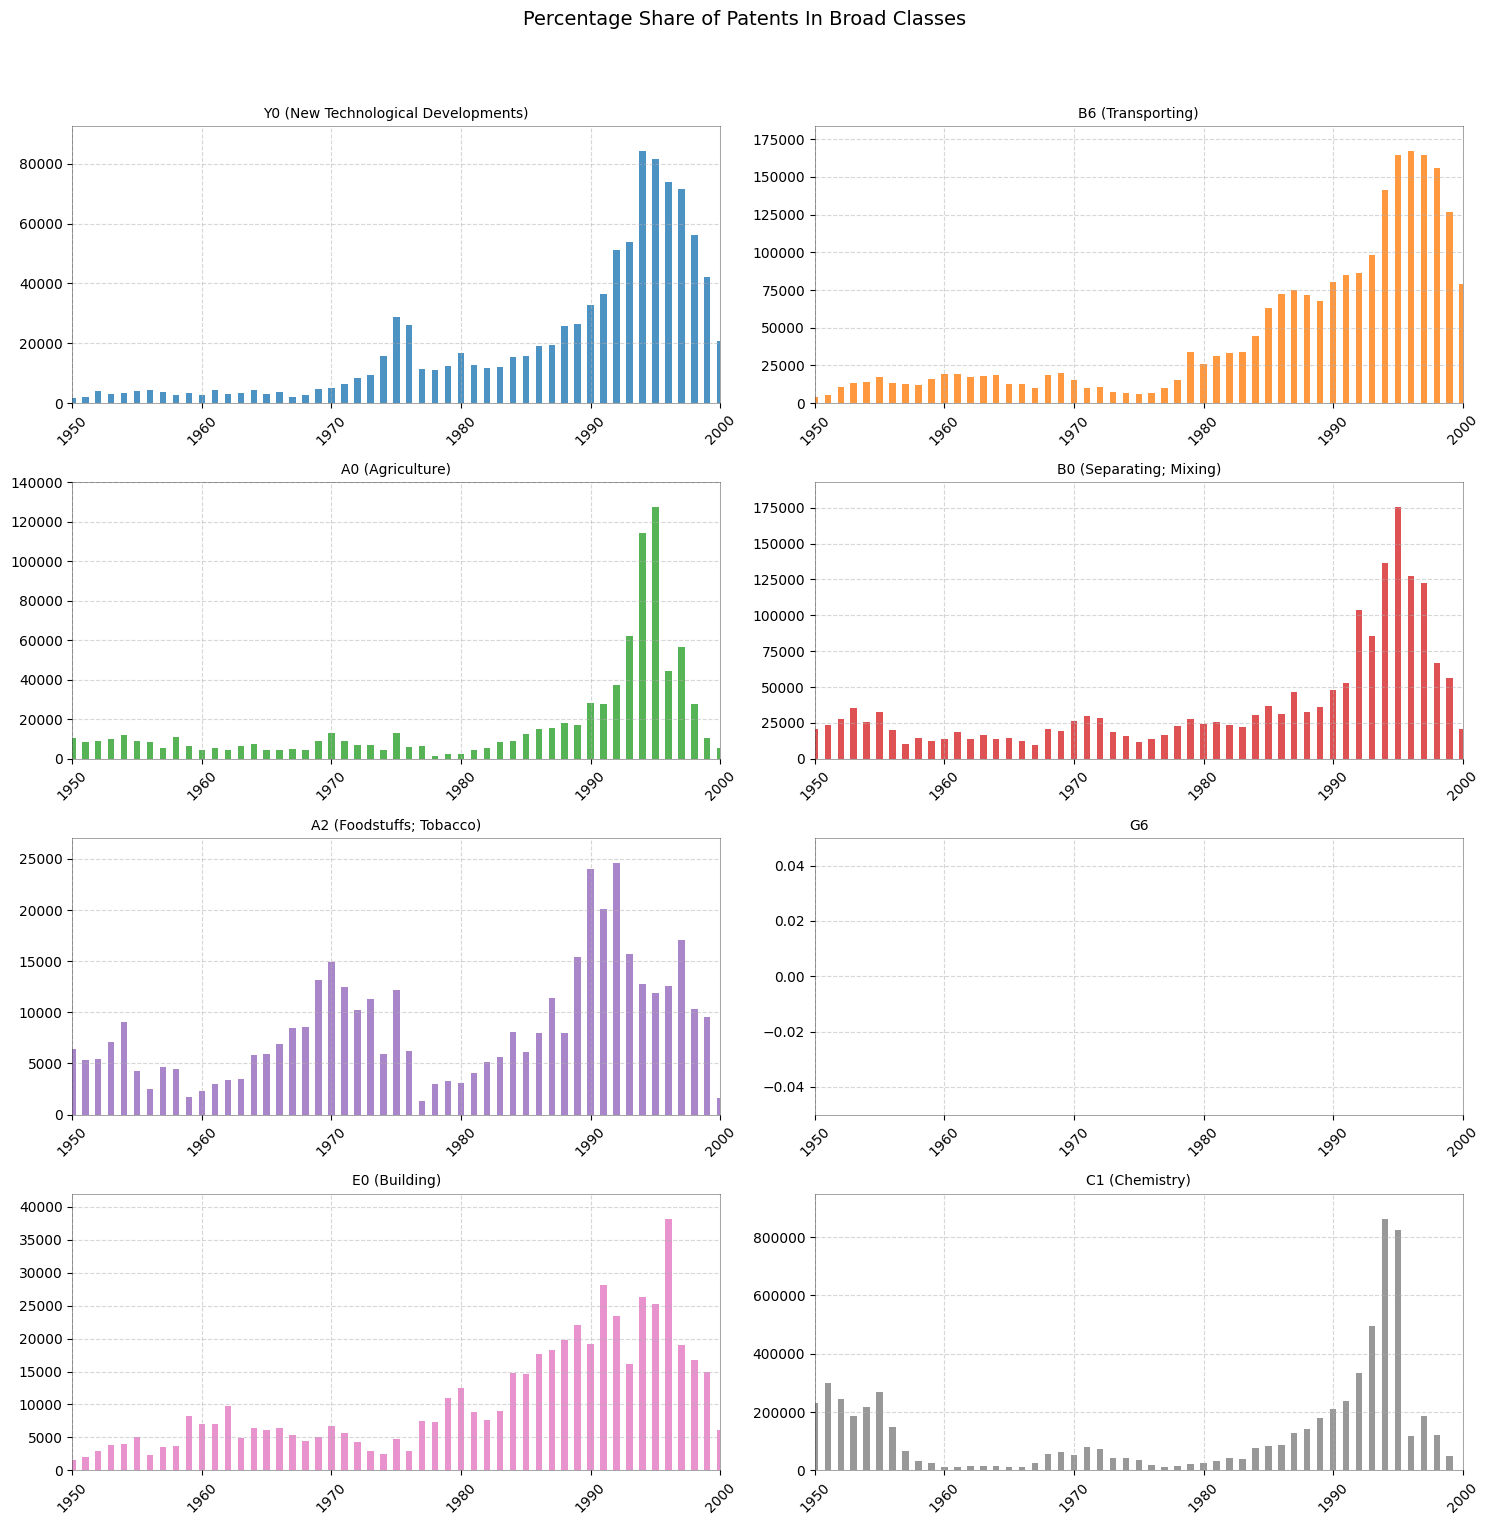

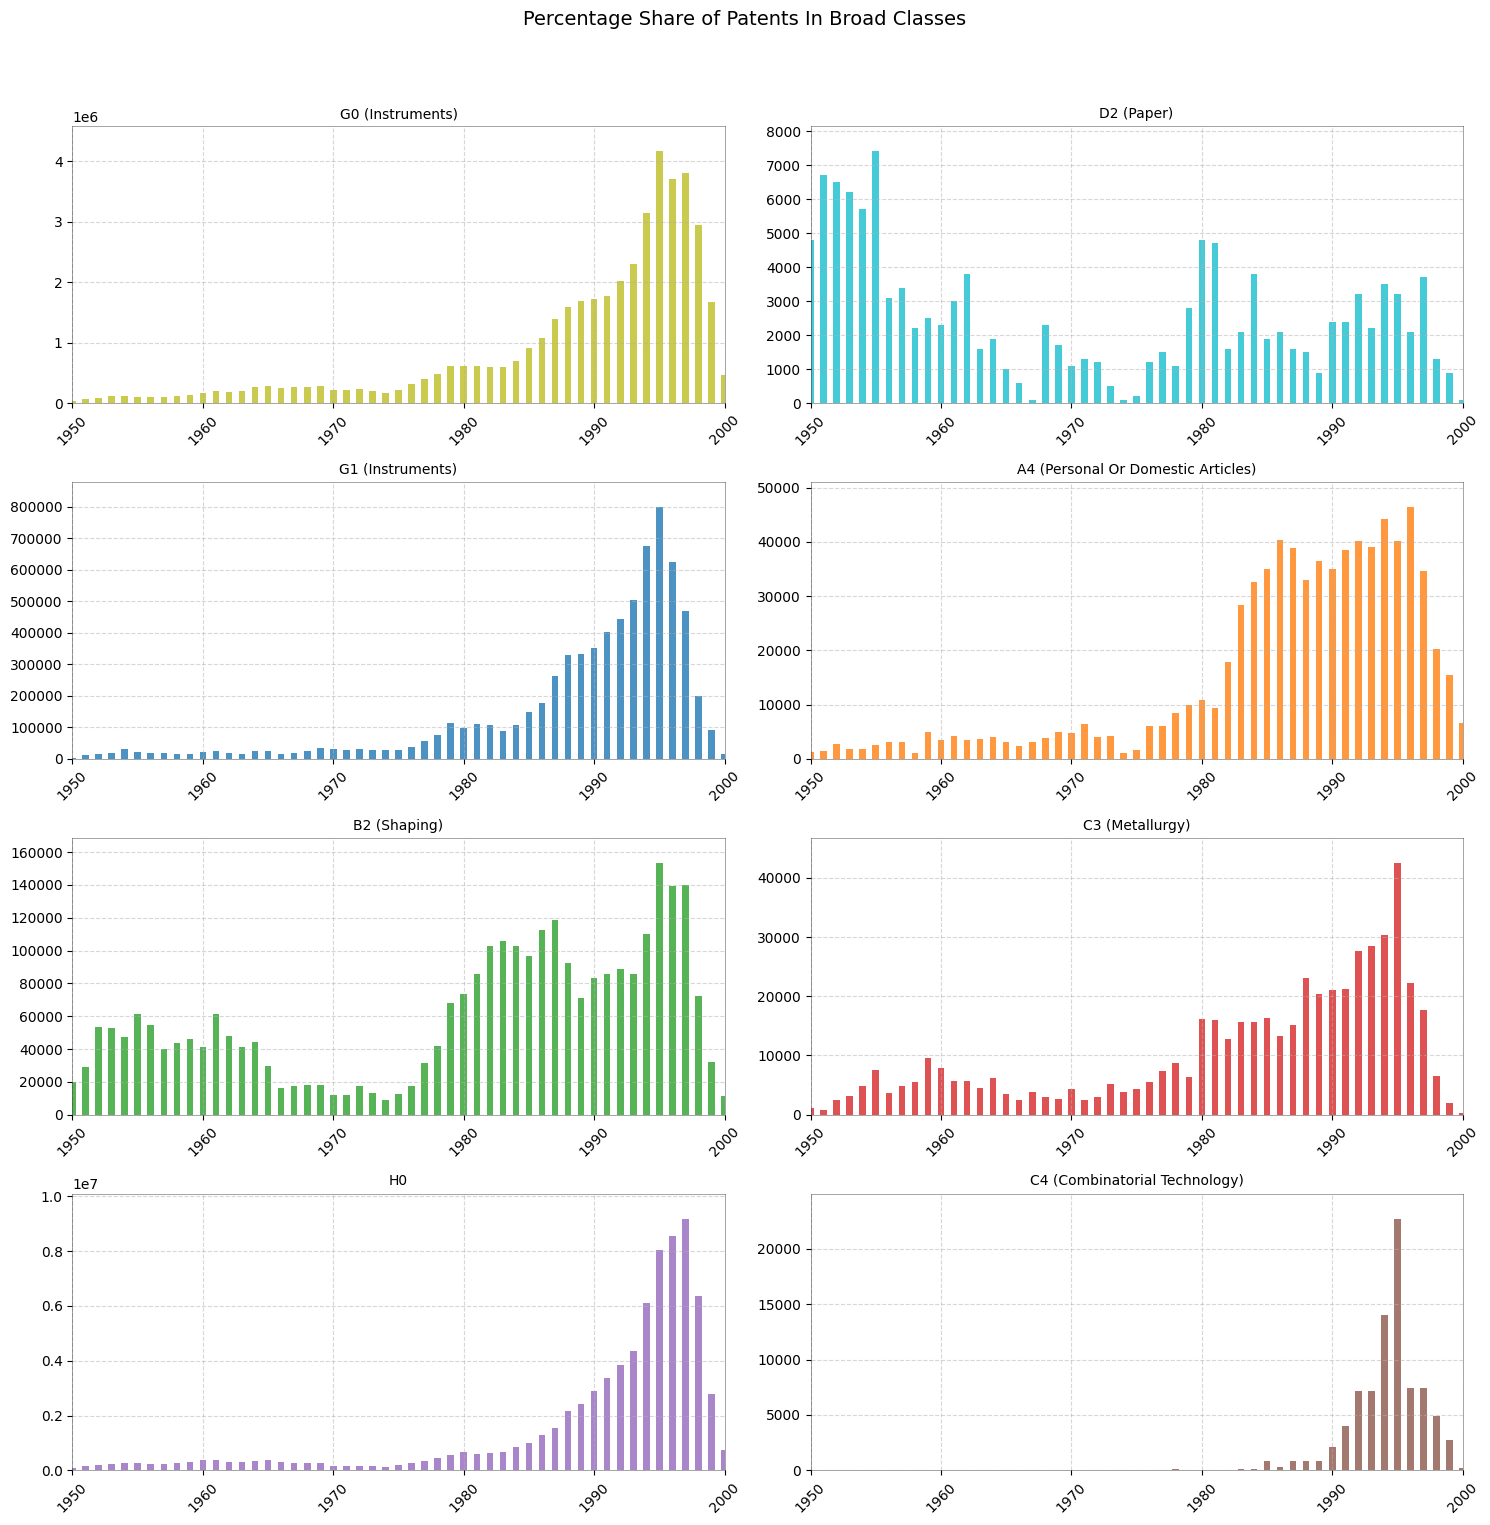

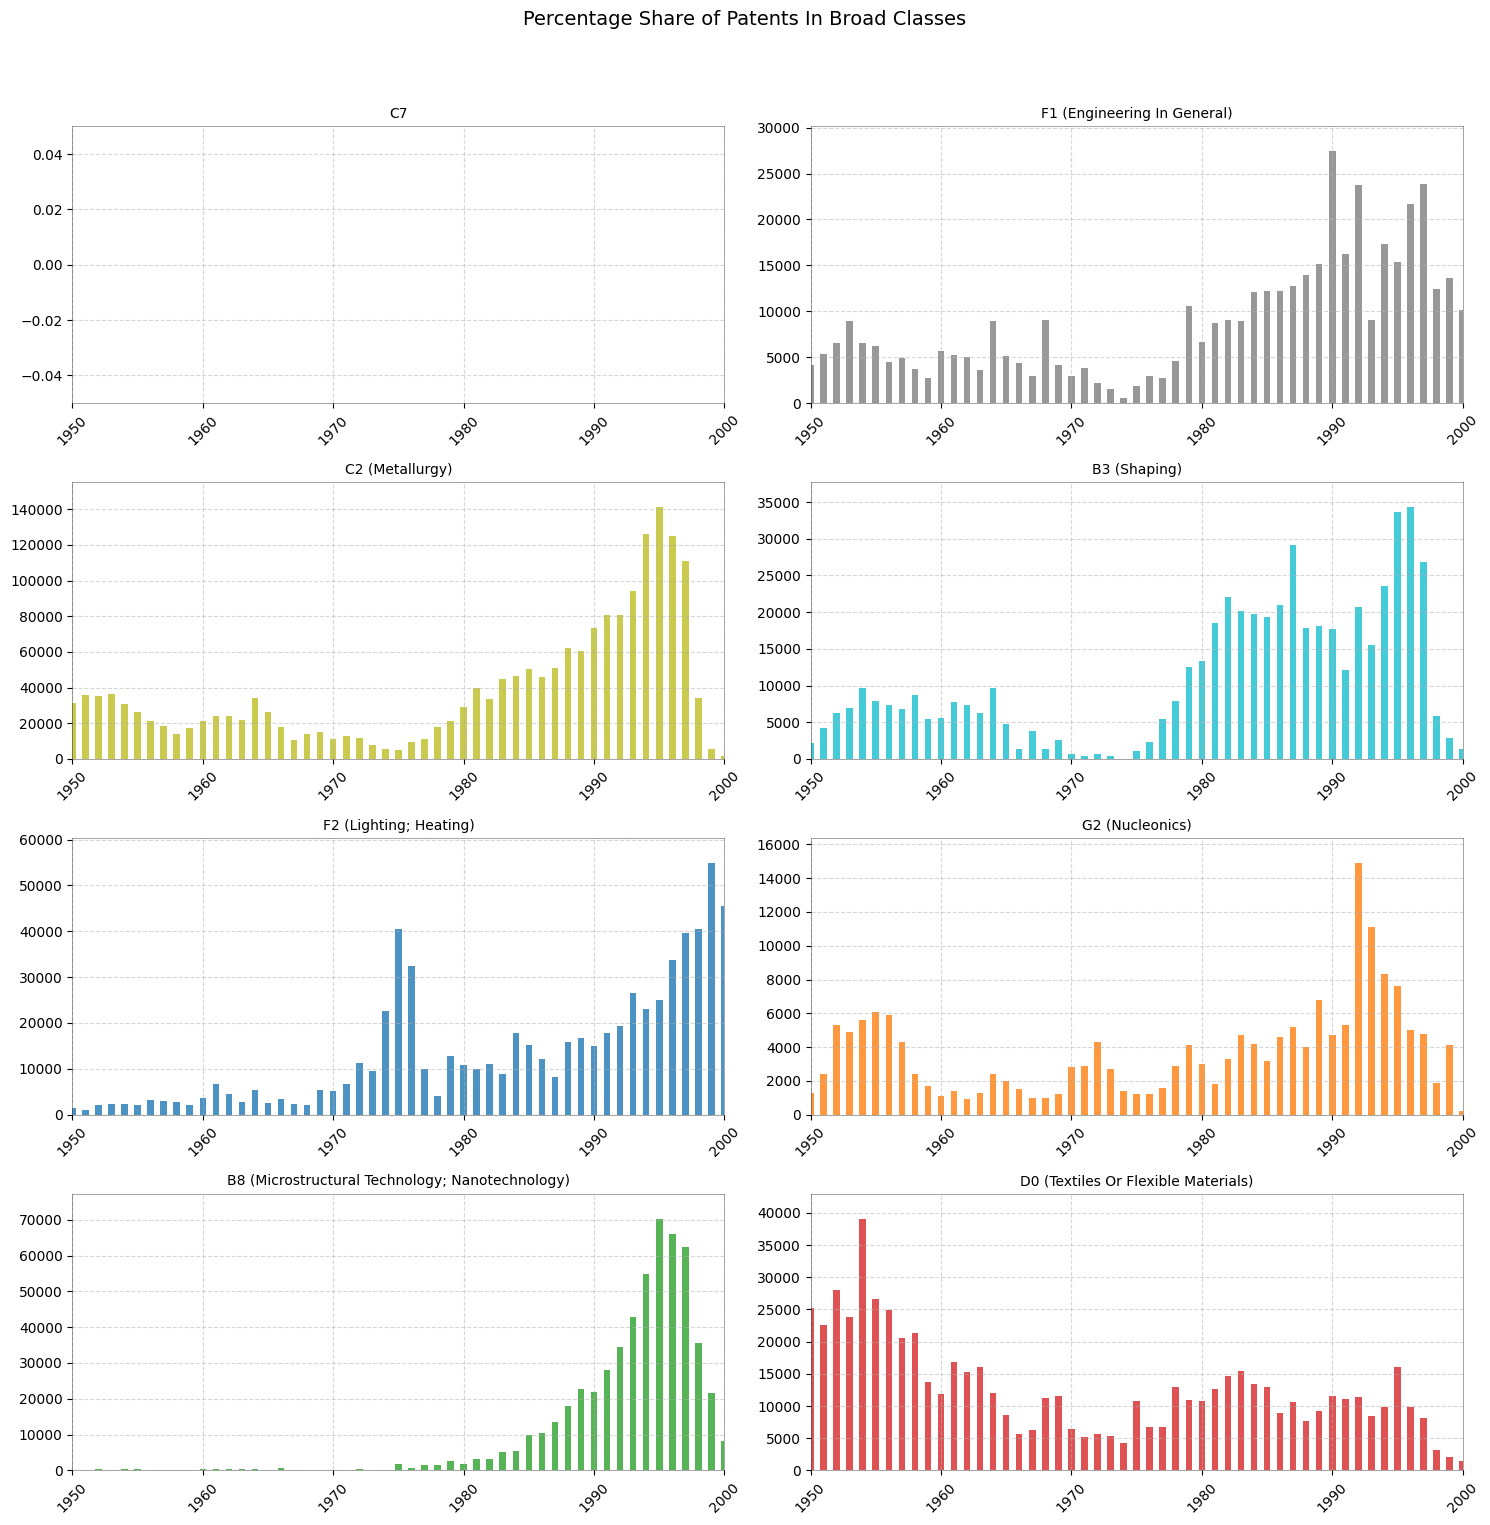

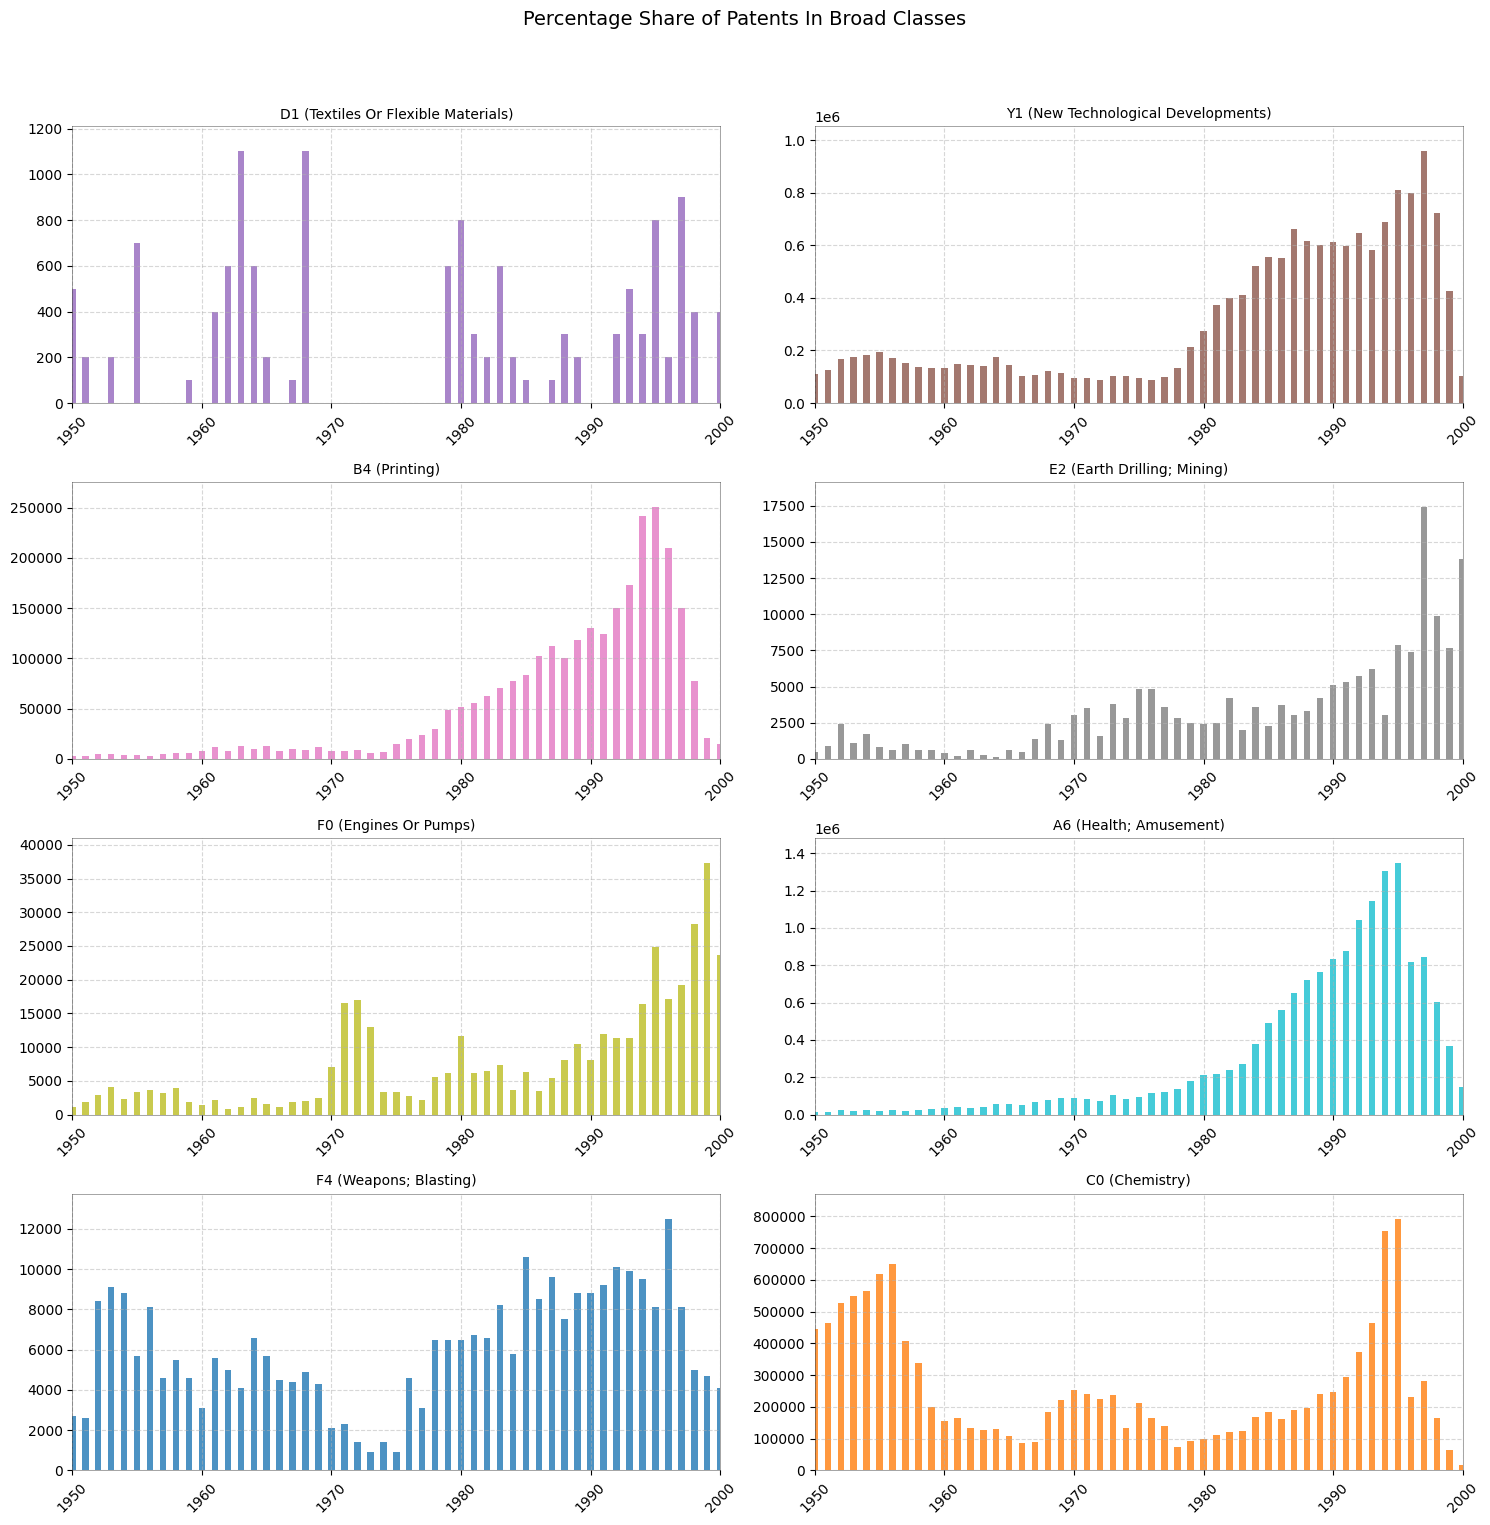

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the columns you want to plot
columns_to_plot = [column for column in bt_df.columns]

# Define the color list for each figure
figure_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Customize the x-axis ticks to appear every 10 years starting from 1840
start_year = 1950
end_year = 2000
tick_positions = range(start_year, end_year + 1, 10)

# Calculate the number of subplots needed
num_plots = len(columns_to_plot)
num_rows = 4
num_cols = 2
num_figures = (num_plots - 1) // (num_rows * num_cols) + 1

# Iterate through figures
for f in range(num_figures):
    # Create a new figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 16))
    fig.suptitle('Percentage Share of Patents In Broad Classes', fontsize=14)

    # Iterate through subplots in the current figure
    for i, ax in enumerate(axes.flat):
        # Calculate the index of the current column
        column_idx = f * (num_rows * num_cols) + i

        # Check if the column index is within the range of columns to plot
        if column_idx < num_plots:
            # Get the column name
            column = columns_to_plot[column_idx]

            # Find the name corresponding to the current column
            try:
                name_of_column = df_name.loc[df_name['code'] == column, 'name'].values[0]
            except IndexError:
                name_of_column = None  # If code is not found, set name_of_column to None

            # Plot the bar chart with the color specified for the current figure
            ax.bar(bt_df.index, bt_df[column] * 100, color=figure_colors[column_idx % 10], width=0.5, alpha=0.8)

            # Set x-axis limits and ticks
            ax.set_xlim(start_year, end_year)
            ax.set_xticks(tick_positions)
            ax.set_xticklabels(tick_positions, rotation=45)  # Rotate x-axis labels for better readability

            # Filter data between 1840 and 2014 for the specified column
            filtered_data = bt_df.loc[(bt_df.index >= start_year) & (bt_df.index <= end_year), column]

            # Calculate the maximum y-axis limit for the current plot
            max_share = (filtered_data * 100).max() * 1.1

            # Set y-axis limit
            ax.set_ylim([0, max_share])

            # Determine the title for the current subplot
            if name_of_column:
                subplot_title = f'{column} ({name_of_column})'
            else:
                subplot_title = f'{column}'

            # Add title for the subplot
            ax.set_title(subplot_title, fontsize=10)

            # Add a light grid
            ax.grid(axis='y', linestyle='--', alpha=0.5)
            ax.grid(axis='x', linestyle='--', alpha=0.5)
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(0.5)
                spine.set_alpha(0.5)
        else:
            # If the column index is out of range, remove the subplot
            fig.delaxes(ax)

    # Adjust layout to prevent cropping and display the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #plt.savefig(f'{f}_Patents.png', dpi=300)
    plt.show()
    #files.download(f'{f}_Patents.png')

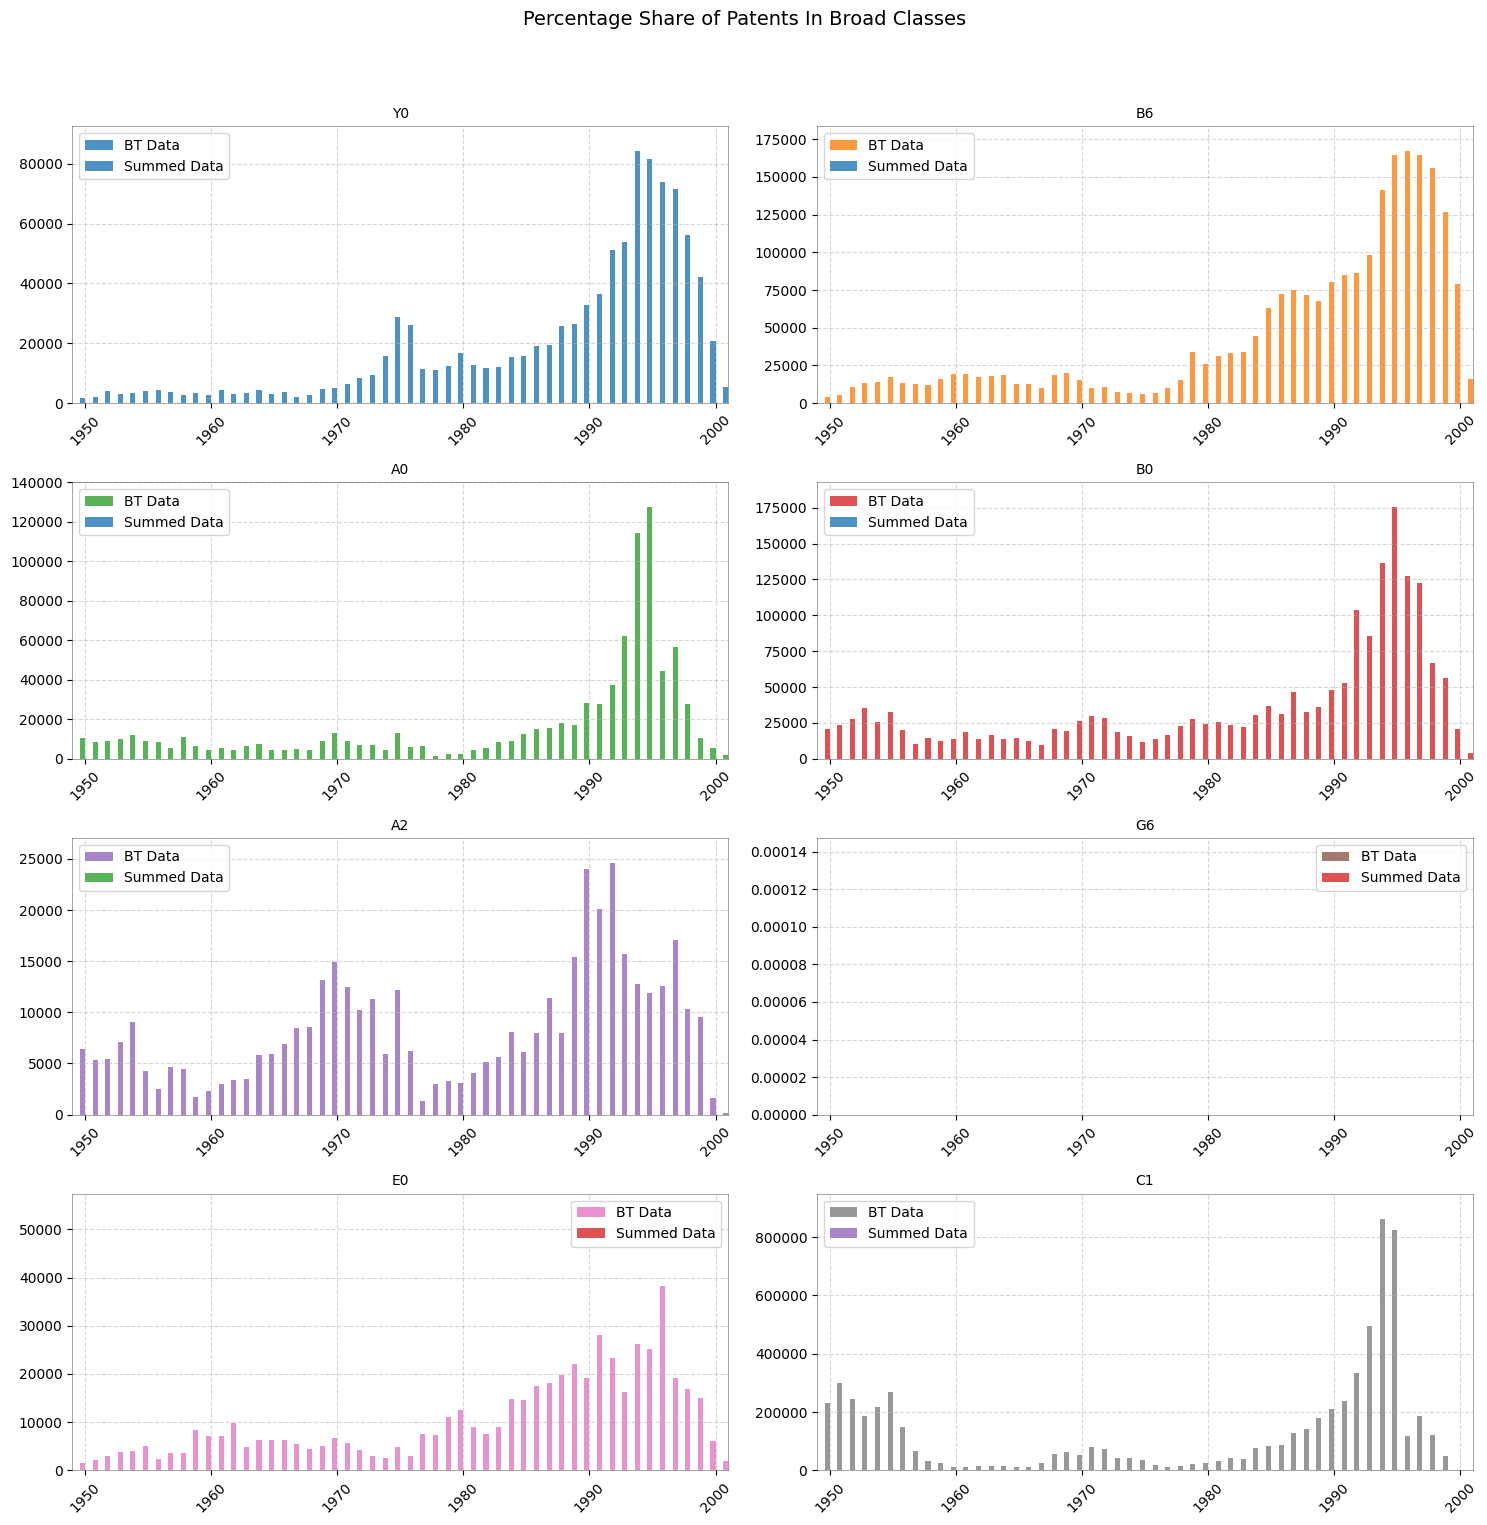

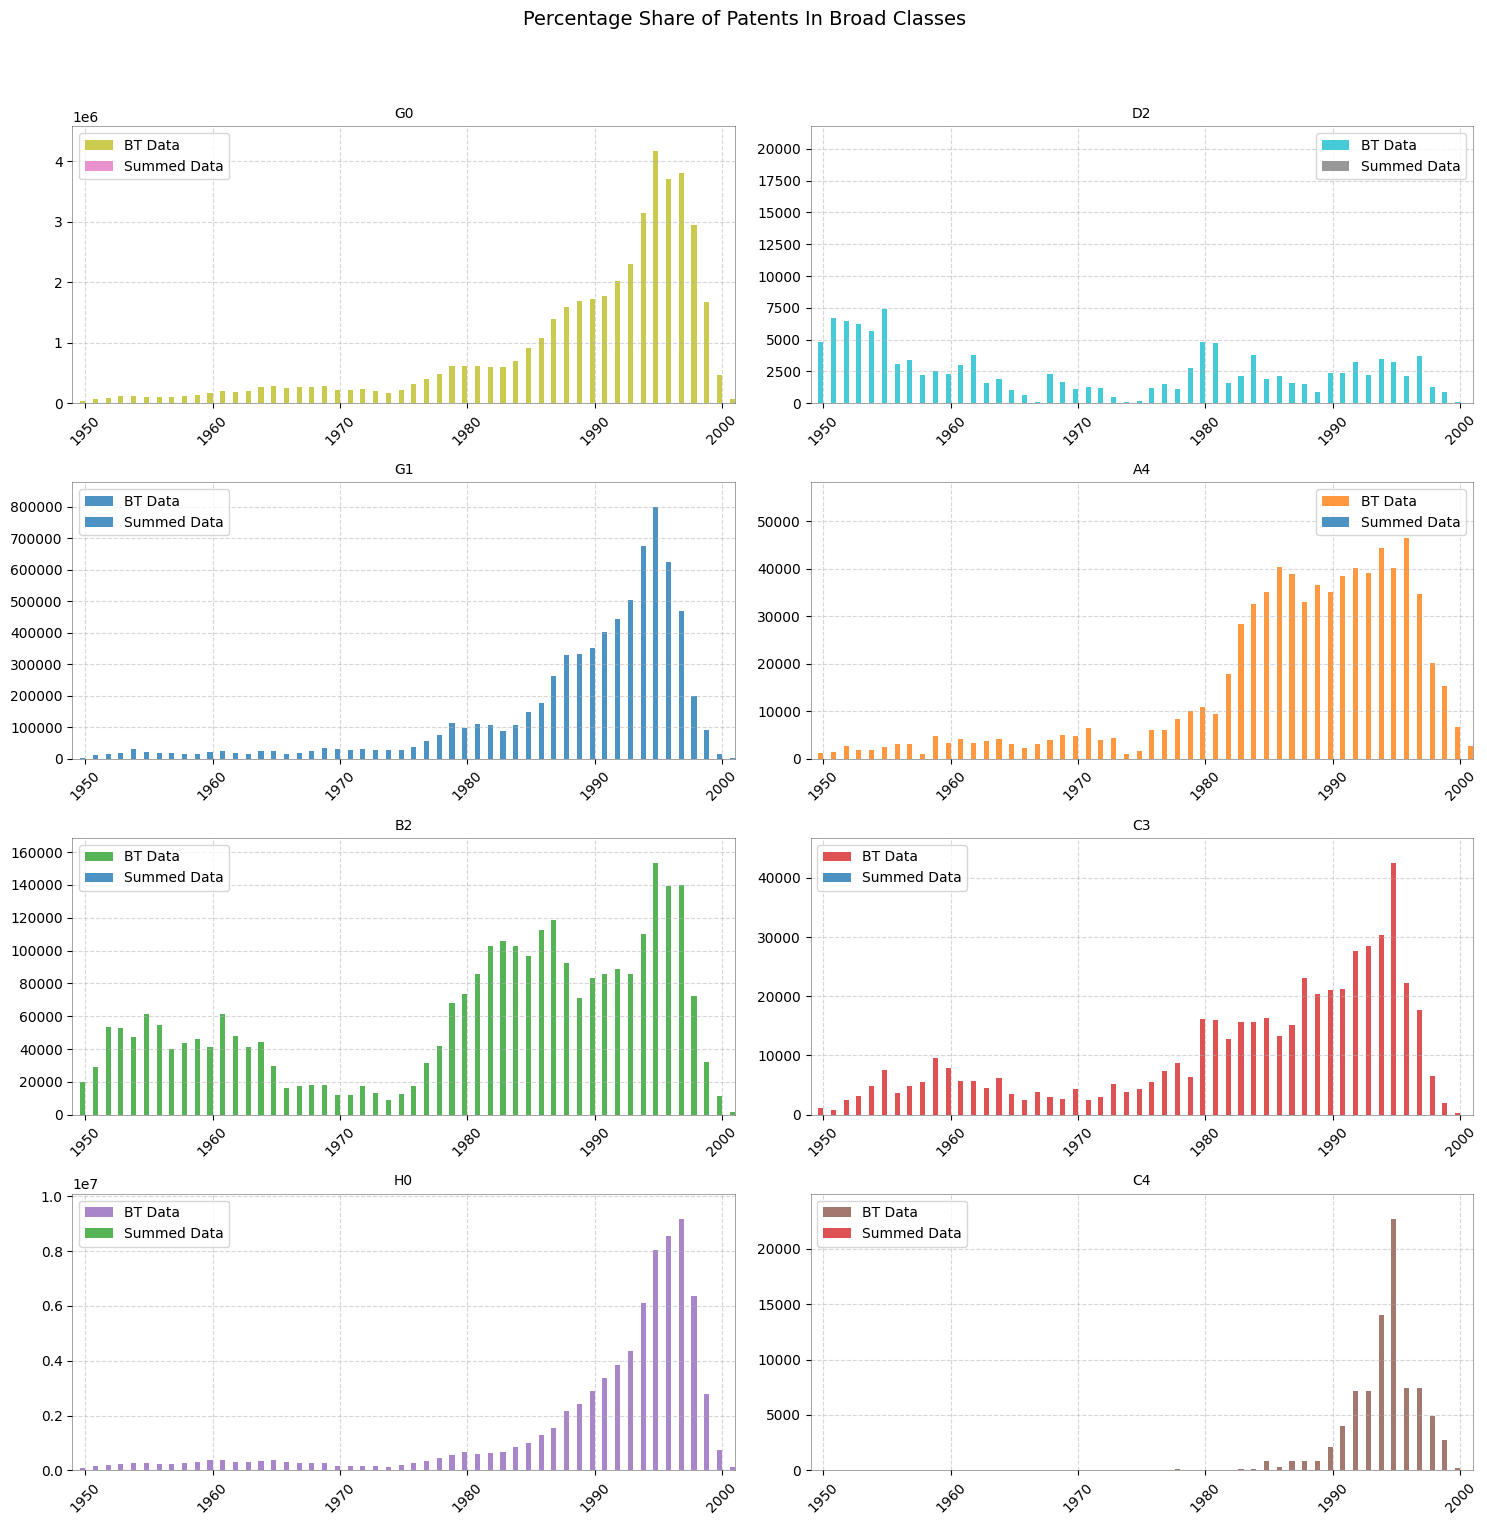

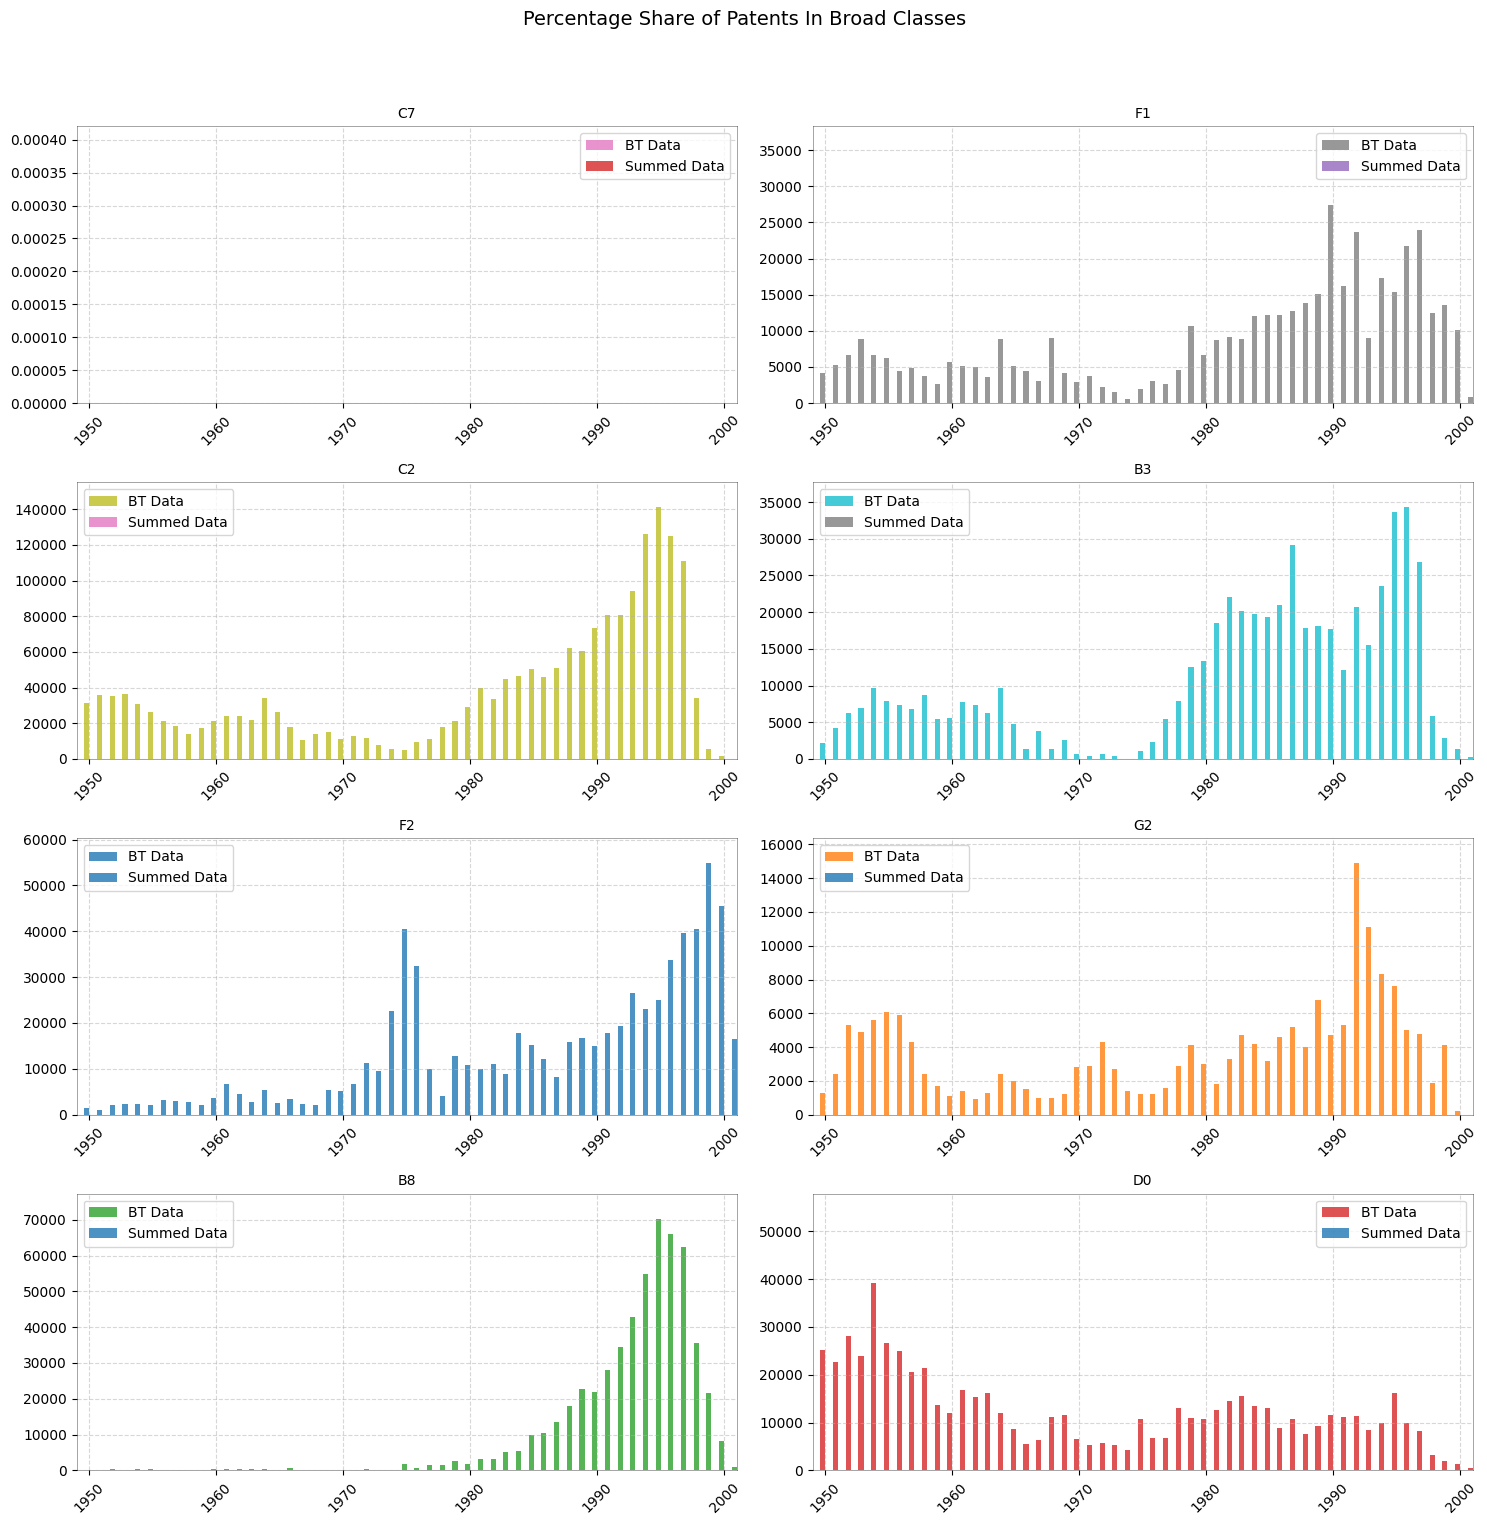

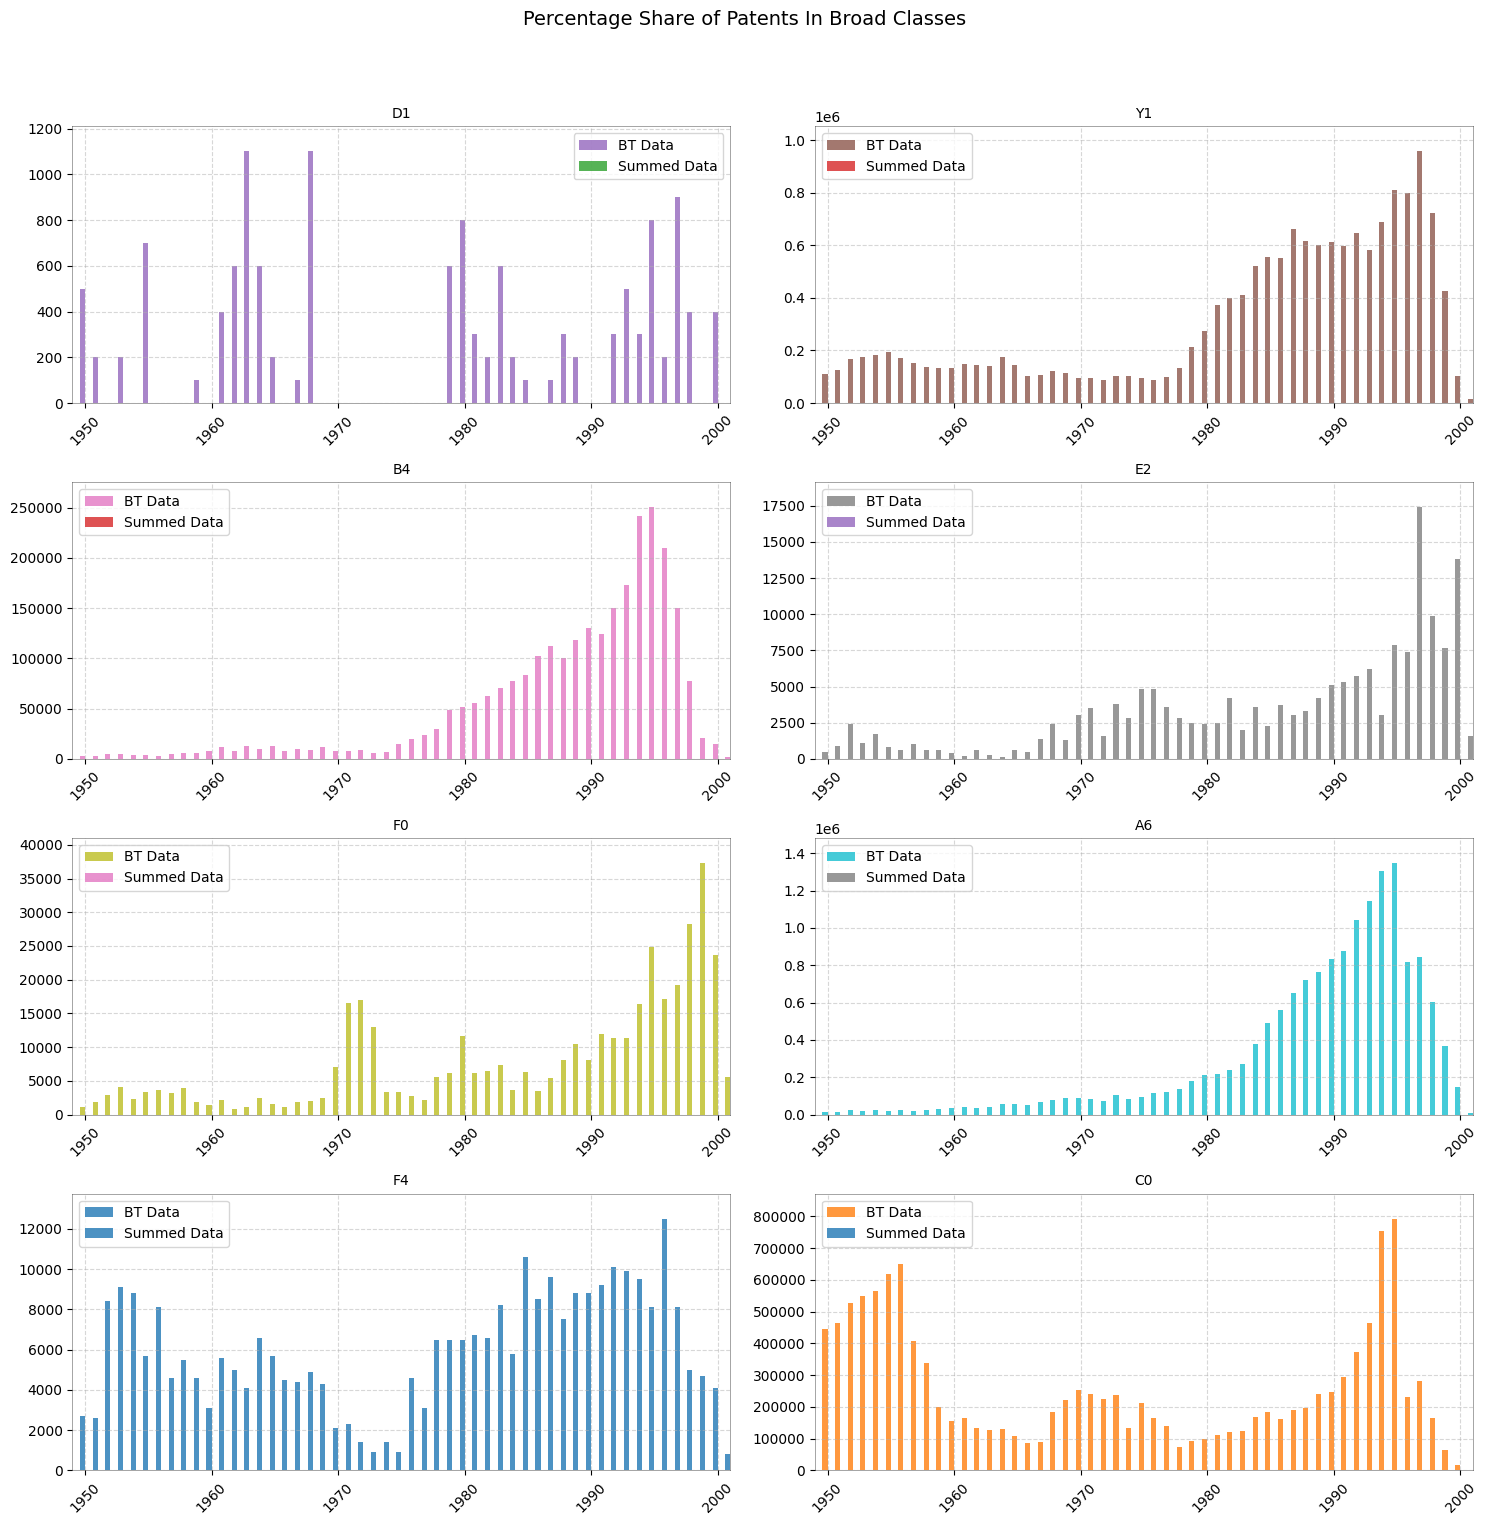

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure columns_to_plot only includes columns present in both DataFrames
columns_to_plot = [column for column in bt_df.columns if column in summed_df.columns]

# Define the color list for each figure, using lighter and darker shades
figure_colors_light = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
figure_colors_dark = [plt.get_cmap('tab10')(i / 10 - 0.2) for i in range(10)]

# Customize the x-axis ticks to appear every 10 years starting from 1950
start_year = 1950
end_year = 2000
tick_positions = range(start_year, end_year + 1, 10)

# Calculate the number of subplots needed
num_plots = len(columns_to_plot)
num_rows = 4
num_cols = 2
num_figures = (num_plots - 1) // (num_rows * num_cols) + 1

# Bar width and offset
bar_width = 0.4
offset = bar_width / 2

# Iterate through figures
for f in range(num_figures):
    # Create a new figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 16))
    fig.suptitle('Percentage Share of Patents In Broad Classes', fontsize=14)

    # Iterate through subplots in the current figure
    for i, ax in enumerate(axes.flat):
        # Calculate the index of the current column
        column_idx = f * (num_rows * num_cols) + i

        # Check if the column index is within the range of columns to plot
        if column_idx < num_plots:
            # Get the column name
            column = columns_to_plot[column_idx]

            # Check if column exists in both DataFrames
            if column in summed_df and column in bt_df:
                # Plot bars for both datasets
                ax.bar(bt_df.index - offset, bt_df[column] * 100, color=figure_colors_light[column_idx % 10], width=bar_width, alpha=0.8, label='BT Data')
                ax.bar(summed_df.index + offset, summed_df[column] * 100, color=figure_colors_dark[column_idx % 10], width=bar_width, alpha=0.8, label='Summed Data')

                # Set x-axis limits and ticks
                ax.set_xlim(start_year - 1, end_year + 1)
                ax.set_xticks(tick_positions)
                ax.set_xticklabels(tick_positions, rotation=45)

                # Calculate the maximum y-axis limit for both datasets
                max_share = max((bt_df[column] * 100).max(), (summed_df[column] * 100).max()) * 1.1
                ax.set_ylim([0, max_share])

                # Add a title for the subplot
                ax.set_title(column, fontsize=10)

                # Add a light grid
                ax.grid(axis='y', linestyle='--', alpha=0.5)
                ax.grid(axis='x', linestyle='--', alpha=0.5)
                for spine in ax.spines.values():
                    spine.set_edgecolor('black')
                    spine.set_linewidth(0.5)
                    spine.set_alpha(0.5)
                ax.legend()
            else:
                fig.delaxes(ax)
        else:
            fig.delaxes(ax)

    # Adjust layout to prevent cropping and display the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
